# Draft file

In [1]:
import json
from pathlib import Path

In [3]:
data_dir = Path("data", "geojson")
out_dir =Path('clean')


In [4]:
# Open and parse the geojson file
file_name = 'Output0.geojson'

with open(data_dir / file_name) as f:
    data = json.load(f)


In [5]:
data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-63756.01578319579, -10414.190415866586],
      [-63837.95048326551, -13191.440814358793],
      [-58978.97625346371, -13191.440814358793],
      [-58978.97625346371, -33765.00256387098],
      [-43050.62825285748, -33765.00256387098],
      [-43050.62825285748, -50988.39935616695],
      [-42099.22234913107, -50988.39935616695],
      [-42099.22234913107, -65078.15990299577],
      [-39385.13083050569, -65078.15990299577],
      [-39385.13083050569, -36283.99786436476],
      [-16621.451263132796, -36283.99786436476],
      [-16621.451263132796, -41483.828077261365],
      [-14009.968091753835, -41483.828077261365],
      [-14009.968091753835, -29956.72772752217],
      [-4859.892984029837, -29956.72772752217],
      [-4859.892984029837, -28075.077159920533],
      [-11175.87418012711, -28075.077159920533],
      [-11175.87418012711, -22552.97553125862],
      [-165

In [6]:
# Count the kind of features
feature_count = {}
for feature in data['features']:
    feature_type = feature['geometry']['type']
    if feature_type not in feature_count:
        feature_count[feature_type] = 0
    feature_count[feature_type] += 1
print(feature_count)

{'Polygon': 4, 'MultiLineString': 1}


In [7]:
# Open all files in folder data_dir, then parse them and count the kind of features

for file in data_dir.iterdir():
    with open(file) as f:
        data = json.load(f)
    feature_count = {}
    for feature in data['features']:
        feature_type = feature['geometry']['type']
        if feature_type not in feature_count:
            feature_count[feature_type] = 0
        feature_count[feature_type] += 1
    print(file, feature_count)

data/geojson/Output3.geojson {'MultiLineString': 1}
data/geojson/Output2.geojson {'Polygon': 18, 'MultiLineString': 1}
data/geojson/Output0.geojson {'Polygon': 4, 'MultiLineString': 1}
data/geojson/Output1.geojson {'Polygon': 251, 'MultiLineString': 1}
data/geojson/Output8.geojson {'MultiLineString': 1}
data/geojson/Output4.geojson {'Polygon': 6, 'MultiLineString': 1}
data/geojson/Output5.geojson {'Polygon': 94, 'MultiLineString': 1}
data/geojson/Output9_clinique.geojson {'Polygon': 152, 'MultiLineString': 1}
data/geojson/Output10_circ.geojson {'Polygon': 70, 'MultiLineString': 1}
data/geojson/Output6.geojson {'Polygon': 685, 'MultiLineString': 1}


We only have two kinds of features: Polygon and MultiLineString that share 
the same geometry["coordinates] : list[list[float]]
They have no other identifier but their index in the features list in the file.

We only need to parse lines.

We will parse first time, then try to infer the scale of the plan (m or mm), then normalize
the bottom left corner at point (0,0)

In [14]:
def read_box_from_file(filepath):
    with open(filepath) as f:
        data = json.load(f)
    min_x = min_y = float('inf')
    max_x = max_y = float('-inf')
    for feature in data['features']:
        multi_line = feature['geometry']['coordinates']
        for line in multi_line:
            for x, y in line:
                min_x = min(min_x, x)
                min_y = min(min_y, y)
                max_x = max(max_x, x)
                max_y = max(max_y, y)
    print(f"{filepath}: {min_x:.3f}, {min_y:.3f}, {max_x:.3f}, {max_y:.3f}")   
    

In [15]:
parse_file(data_dir / 'Output0.geojson')

data/geojson/Output0.geojson: -96597.654, -82411.475, 214.174, -10203.309


In [16]:
# check the bounding box of all files in data_dir
for file in data_dir.iterdir():
    parse_file(file)

data/geojson/Output3.geojson: 9.355, 8.811, 97.959, 49.014
data/geojson/Output2.geojson: -378955.818, 339833.892, -349483.041, 385197.738
data/geojson/Output0.geojson: -96597.654, -82411.475, 214.174, -10203.309
data/geojson/Output1.geojson: 558.274, 440.154, 28018.274, 141300.154
data/geojson/Output8.geojson: inf, inf, -inf, -inf
data/geojson/Output4.geojson: -150.529, 254.190, 42971.667, 40563.720
data/geojson/Output5.geojson: 626.832, 374.126, 871.513, 455.707
data/geojson/Output9_clinique.geojson: -26.361, 0.032, -20.600, 10.092
data/geojson/Output10_circ.geojson: -385.567, -9.215, -327.395, 54.035
data/geojson/Output6.geojson: -66093.003, -79261.600, -8449.474, -22304.506


In [17]:
def find_float_pairs(data):
    float_pairs = []

    def search(data):
        if isinstance(data, list):
            if len(data) == 2 and all(isinstance(item, float) for item in data):
                float_pairs.append(data)
            for item in data:
                search(item)
        elif isinstance(data, dict):
            for key, value in data.items():
                search(value)

    search(data)
    return float_pairs

# Example usage
filepath = data_dir / 'Output0.geojson'
with open(filepath) as f:
    data = json.load(f)

float_pairs = find_float_pairs(data)
print(float_pairs)

[[-63756.01578319579, -10414.190415866586], [-63837.95048326551, -13191.440814358793], [-58978.97625346371, -13191.440814358793], [-58978.97625346371, -33765.00256387098], [-43050.62825285748, -33765.00256387098], [-43050.62825285748, -50988.39935616695], [-42099.22234913107, -50988.39935616695], [-42099.22234913107, -65078.15990299577], [-39385.13083050569, -65078.15990299577], [-39385.13083050569, -36283.99786436476], [-16621.451263132796, -36283.99786436476], [-16621.451263132796, -41483.828077261365], [-14009.968091753835, -41483.828077261365], [-14009.968091753835, -29956.72772752217], [-4859.892984029837, -29956.72772752217], [-4859.892984029837, -28075.077159920533], [-11175.87418012711, -28075.077159920533], [-11175.87418012711, -22552.97553125862], [-16507.05217203818, -22552.97553125862], [-16507.05217203818, -33579.85317556918], [-22020.490038174787, -33579.85317556918], [-22020.490038174787, -28256.90568786682], [-33383.94304979668, -28256.90568786682], [-33383.94304979668,

In [18]:
%%timeit
filepath = data_dir / 'Output0.geojson'
with open(filepath) as f:
    data = json.load(f)

float_pairs = find_float_pairs(data)

21.1 ms ± 351 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
%%timeit
parse_file(data_dir / 'Output0.geojson')

data/geojson/Output0.geojson: -96597.654, -82411.475, 214.174, -10203.309
data/geojson/Output0.geojson: -96597.654, -82411.475, 214.174, -10203.309
data/geojson/Output0.geojson: -96597.654, -82411.475, 214.174, -10203.309
data/geojson/Output0.geojson: -96597.654, -82411.475, 214.174, -10203.309
data/geojson/Output0.geojson: -96597.654, -82411.475, 214.174, -10203.309
data/geojson/Output0.geojson: -96597.654, -82411.475, 214.174, -10203.309
data/geojson/Output0.geojson: -96597.654, -82411.475, 214.174, -10203.309
data/geojson/Output0.geojson: -96597.654, -82411.475, 214.174, -10203.309
data/geojson/Output0.geojson: -96597.654, -82411.475, 214.174, -10203.309
data/geojson/Output0.geojson: -96597.654, -82411.475, 214.174, -10203.309
data/geojson/Output0.geojson: -96597.654, -82411.475, 214.174, -10203.309
data/geojson/Output0.geojson: -96597.654, -82411.475, 214.174, -10203.309
data/geojson/Output0.geojson: -96597.654, -82411.475, 214.174, -10203.309
data/geojson/Output0.geojson: -96597.6

## Operations

In [77]:
from importlib import reload
import parse_geojson
reload(parse_geojson)


filepath = data_dir / 'Output0.geojson'
segments_0 = parse_geojson.parse_segments_geojson(filepath)
print(len(segments_0))

data/geojson/Output0.geojson: -96597.654, -82411.475, 214.174, -10203.309
data/geojson/Output0.geojson: 5828 segments
5828


In [57]:
segments_0[:5]

[Segment((32.84, 72.00), (32.76, 69.22)),
 Segment((32.76, 69.22), (37.62, 69.22)),
 Segment((37.62, 69.22), (37.62, 48.65)),
 Segment((37.62, 48.65), (53.55, 48.65)),
 Segment((53.55, 48.65), (53.55, 31.42))]

In [73]:
# plot my segment list

import matplotlib.pyplot as plt

def plot_segments(segments, ax):
    for segment in segments:
        ax.plot(*segment.plotable(), '.-', color='black')
    #plt.gca().set_aspect('equal', adjustable='box')
    ax.set_aspect('equal', adjustable='box')

In [51]:
x, y, f = parse_geojson.compute_factor_correction(filepath)
print(type(x), type(y), type(f))

data/geojson/Output0.geojson: -96597.654, -82411.475, 214.174, -10203.309
<class 'float'> <class 'float'> <class 'float'>


In [63]:
reload(parse_geojson)
segments_0 = parse_geojson.parse_segments_geojson_no_center(filepath)
segments_0[:10]

data/geojson/Output0.geojson: 30 segments


[Segment((-63756.02, -10414.19), (-63837.95, -13191.44)),
 Segment((-63837.95, -13191.44), (-58978.98, -13191.44)),
 Segment((-58978.98, -13191.44), (-58978.98, -33765.00)),
 Segment((-58978.98, -33765.00), (-43050.63, -33765.00)),
 Segment((-43050.63, -33765.00), (-43050.63, -50988.40)),
 Segment((-43050.63, -50988.40), (-42099.22, -50988.40)),
 Segment((-42099.22, -50988.40), (-42099.22, -65078.16)),
 Segment((-42099.22, -65078.16), (-39385.13, -65078.16)),
 Segment((-39385.13, -65078.16), (-39385.13, -36284.00)),
 Segment((-39385.13, -36284.00), (-16621.45, -36284.00))]

In [65]:
segments_0_c = parse_geojson.parse_segments_geojson(filepath)
segments_0_c[:10]

data/geojson/Output0.geojson: -96597.654, -82411.475, 214.174, -10203.309
[[-63756.01578319579, -10414.190415866586], [-63837.95048326551, -13191.440814358793]] 
 [(32.84, 72.00), (32.76, 69.22)]
data/geojson/Output0.geojson: 30 segments


[Segment((32.84, 72.00), (32.76, 69.22)),
 Segment((32.76, 69.22), (37.62, 69.22)),
 Segment((37.62, 69.22), (37.62, 48.65)),
 Segment((37.62, 48.65), (53.55, 48.65)),
 Segment((53.55, 48.65), (53.55, 31.42)),
 Segment((53.55, 31.42), (54.50, 31.42)),
 Segment((54.50, 31.42), (54.50, 17.33)),
 Segment((54.50, 17.33), (57.21, 17.33)),
 Segment((57.21, 17.33), (57.21, 46.13)),
 Segment((57.21, 46.13), (79.98, 46.13))]

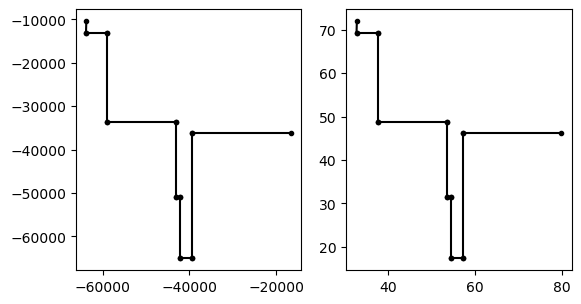

In [74]:
fig, axs = plt.subplots(1,2)
plot_segments(segments_0[:10], axs[0])
plot_segments(segments_0_c[:10], axs[1])
plt.show()

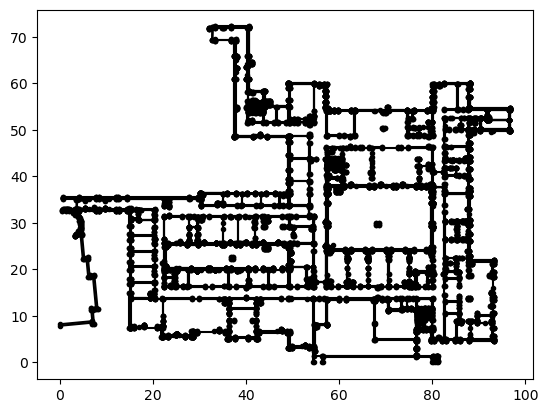

In [78]:
plot_segments(segments_0, plt.gca())

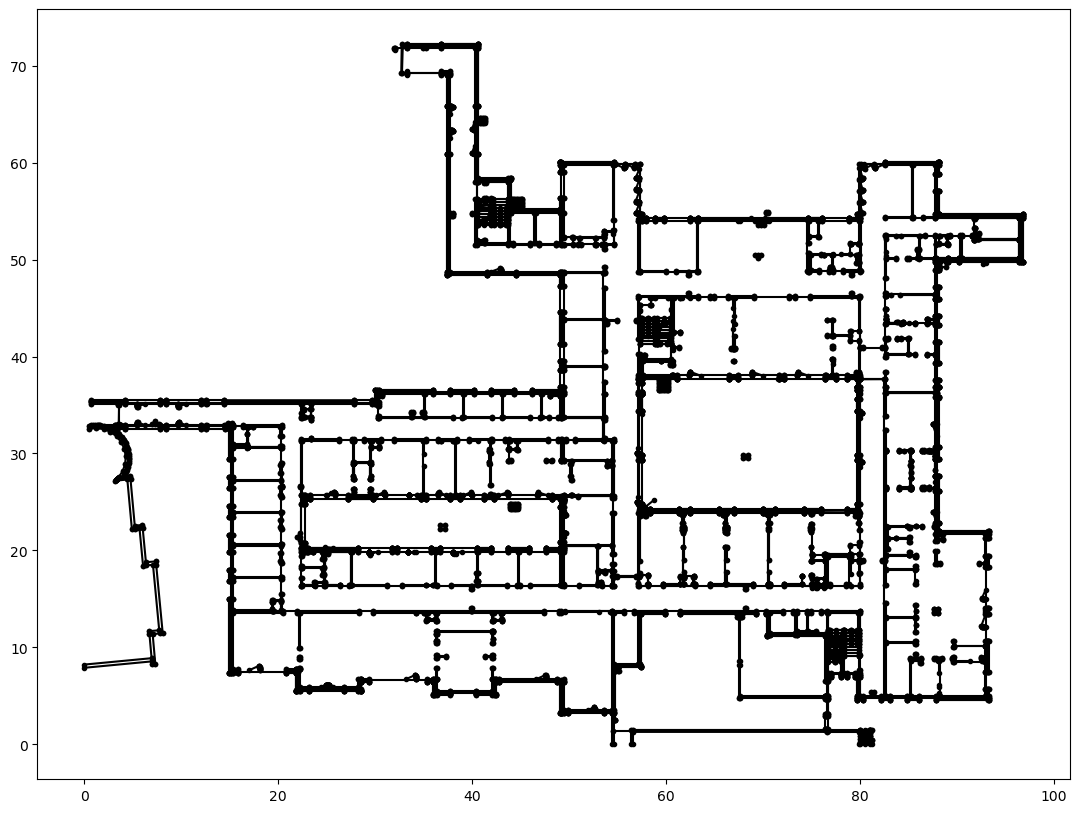

In [79]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_segments(segments_0, ax)

data/geojson/Output3.geojson: 9.355, 8.811, 97.959, 49.014
data/geojson/Output3.geojson: 536 segments
data/geojson/Output2.geojson: -378955.818, 339833.892, -349483.041, 385197.738
data/geojson/Output2.geojson: 22425 segments
data/geojson/Output0.geojson: -96597.654, -82411.475, 214.174, -10203.309
data/geojson/Output0.geojson: 5828 segments
data/geojson/Output1.geojson: 558.274, 440.154, 28018.274, 141300.154
data/geojson/Output1.geojson: 2705 segments
data/geojson/Output8.geojson: inf, inf, -inf, -inf
data/geojson/Output8.geojson: 0 segments
data/geojson/Output4.geojson: -150.529, 254.190, 42971.667, 40563.720
data/geojson/Output4.geojson: 998 segments
data/geojson/Output5.geojson: 626.832, 374.126, 871.513, 455.707
data/geojson/Output5.geojson: 505 segments
data/geojson/Output9_clinique.geojson: -26.361, 0.032, -20.600, 10.092
data/geojson/Output9_clinique.geojson: 6114 segments
data/geojson/Output10_circ.geojson: -385.567, -9.215, -327.395, 54.035
data/geojson/Output10_circ.geojson

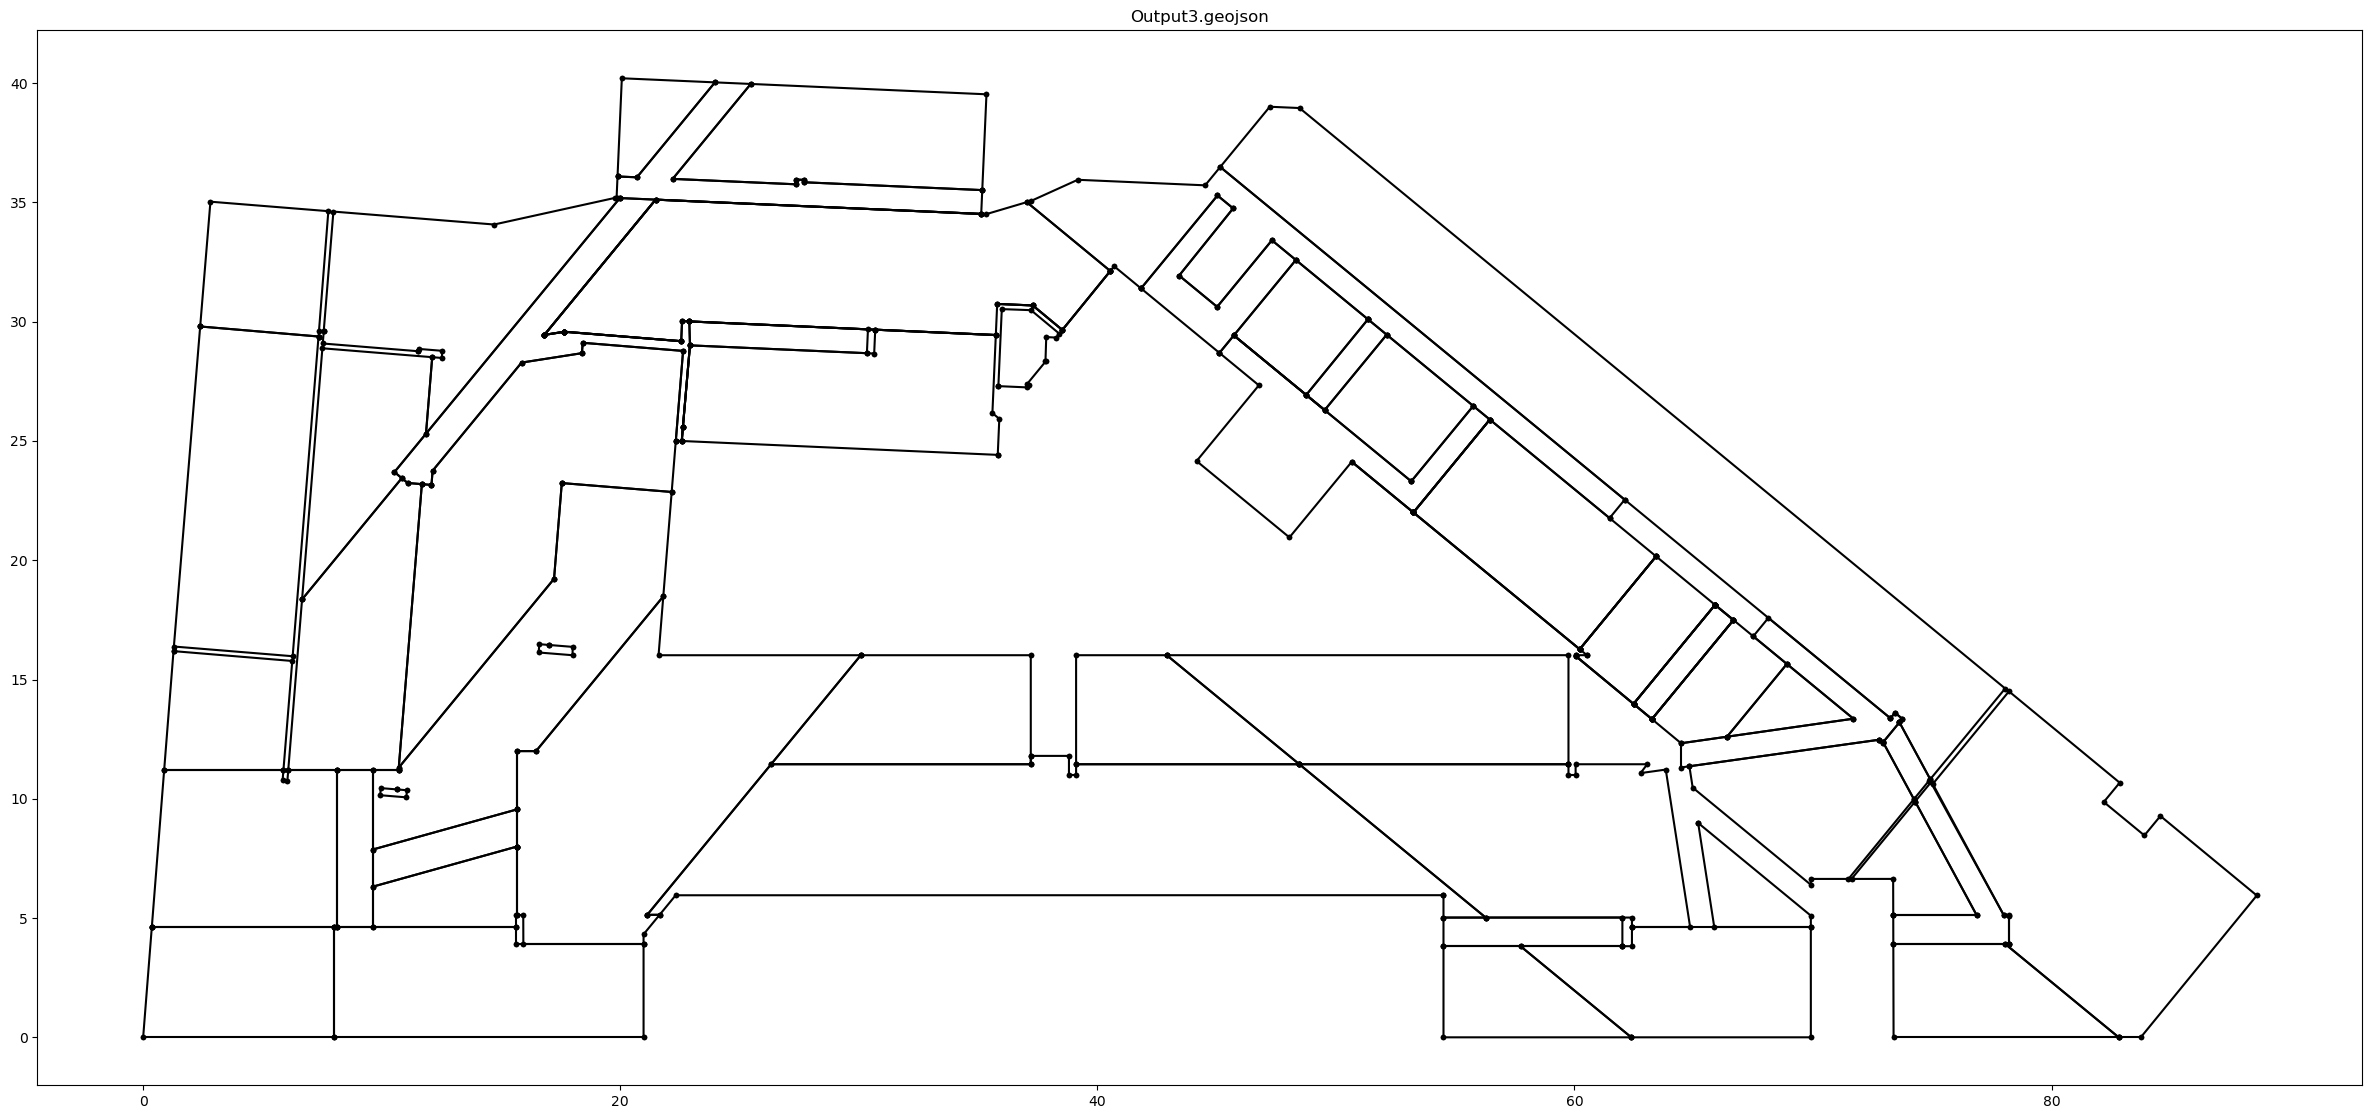

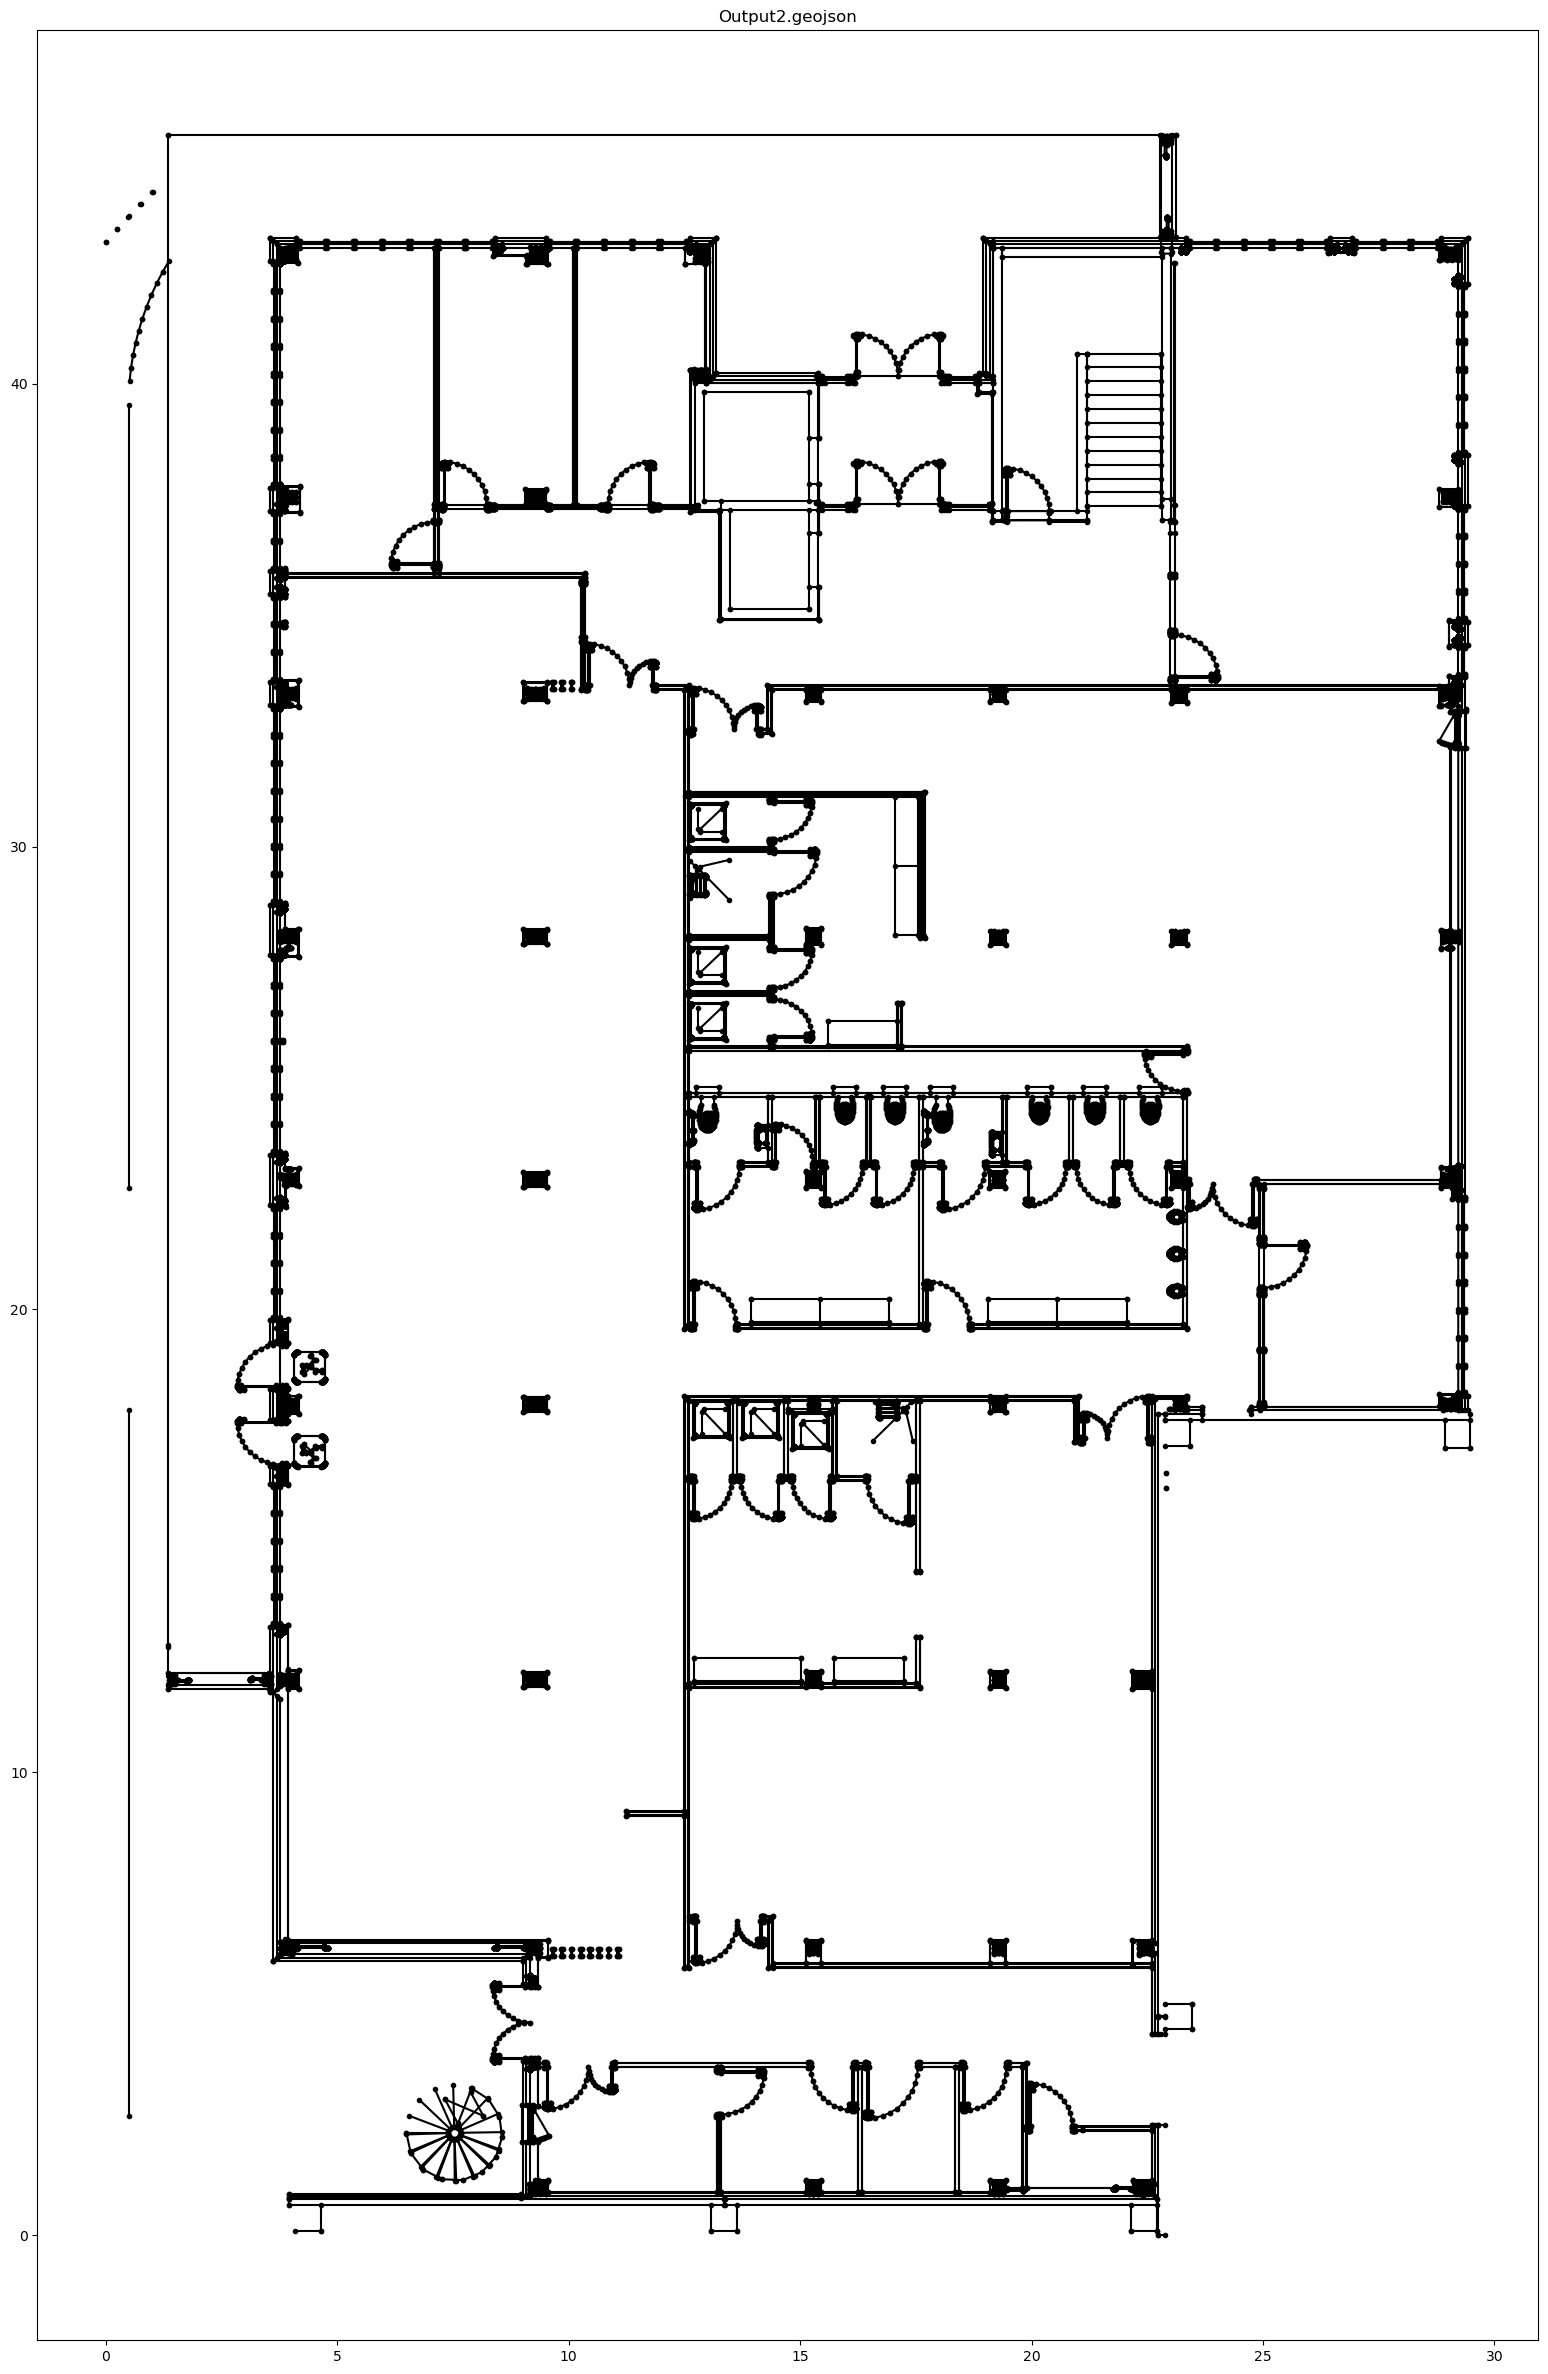

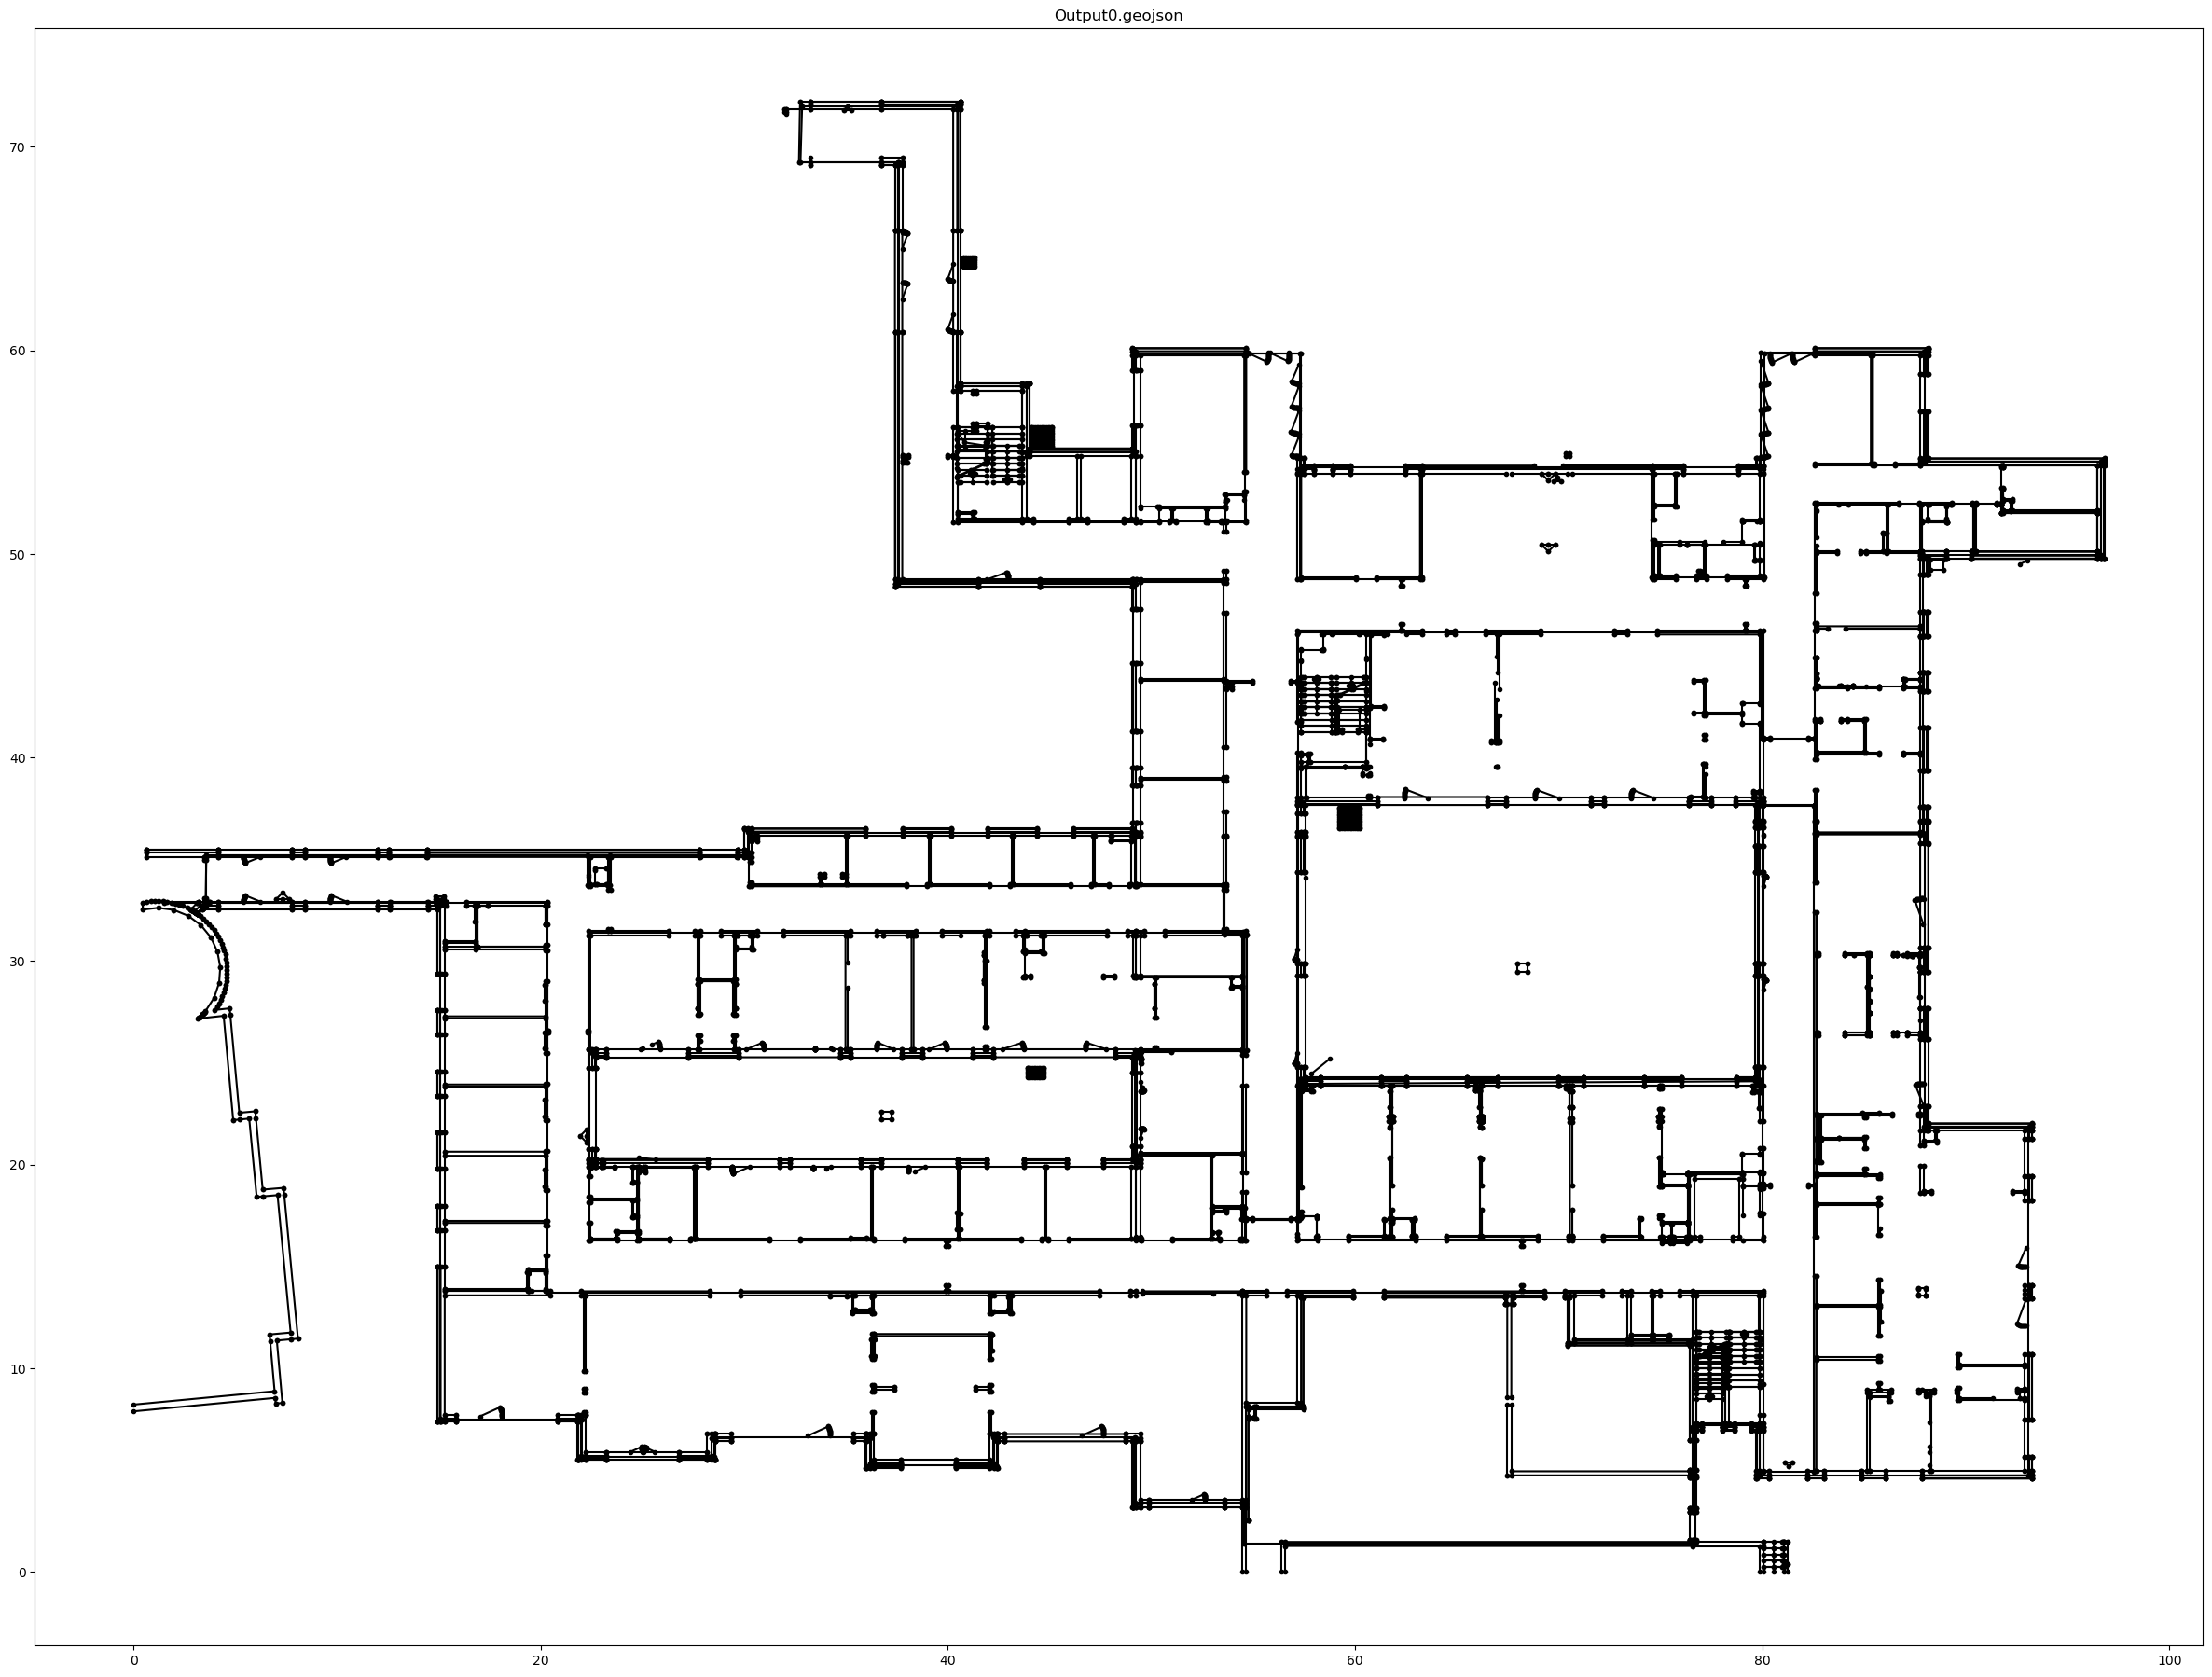

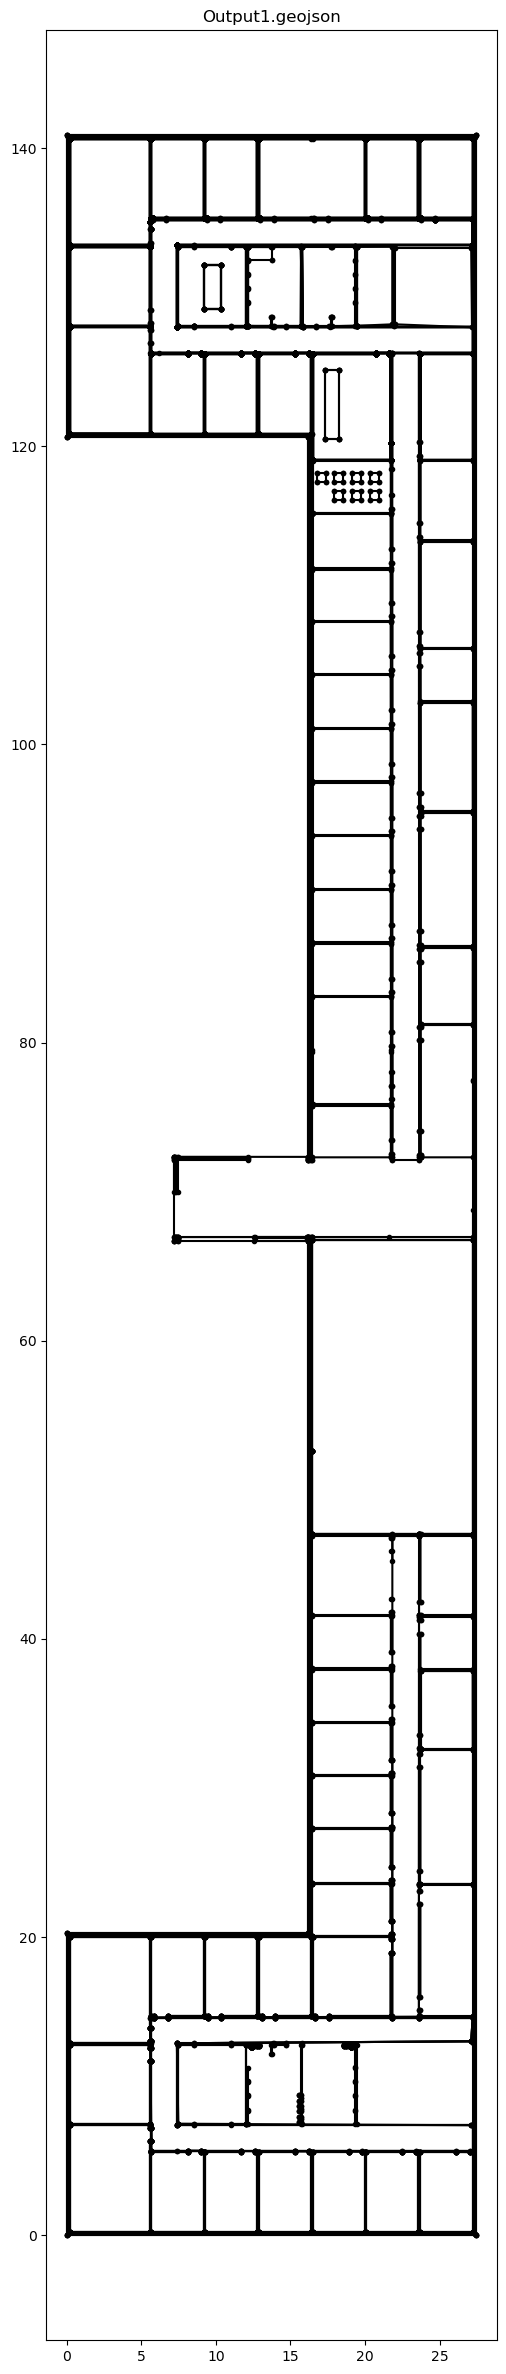

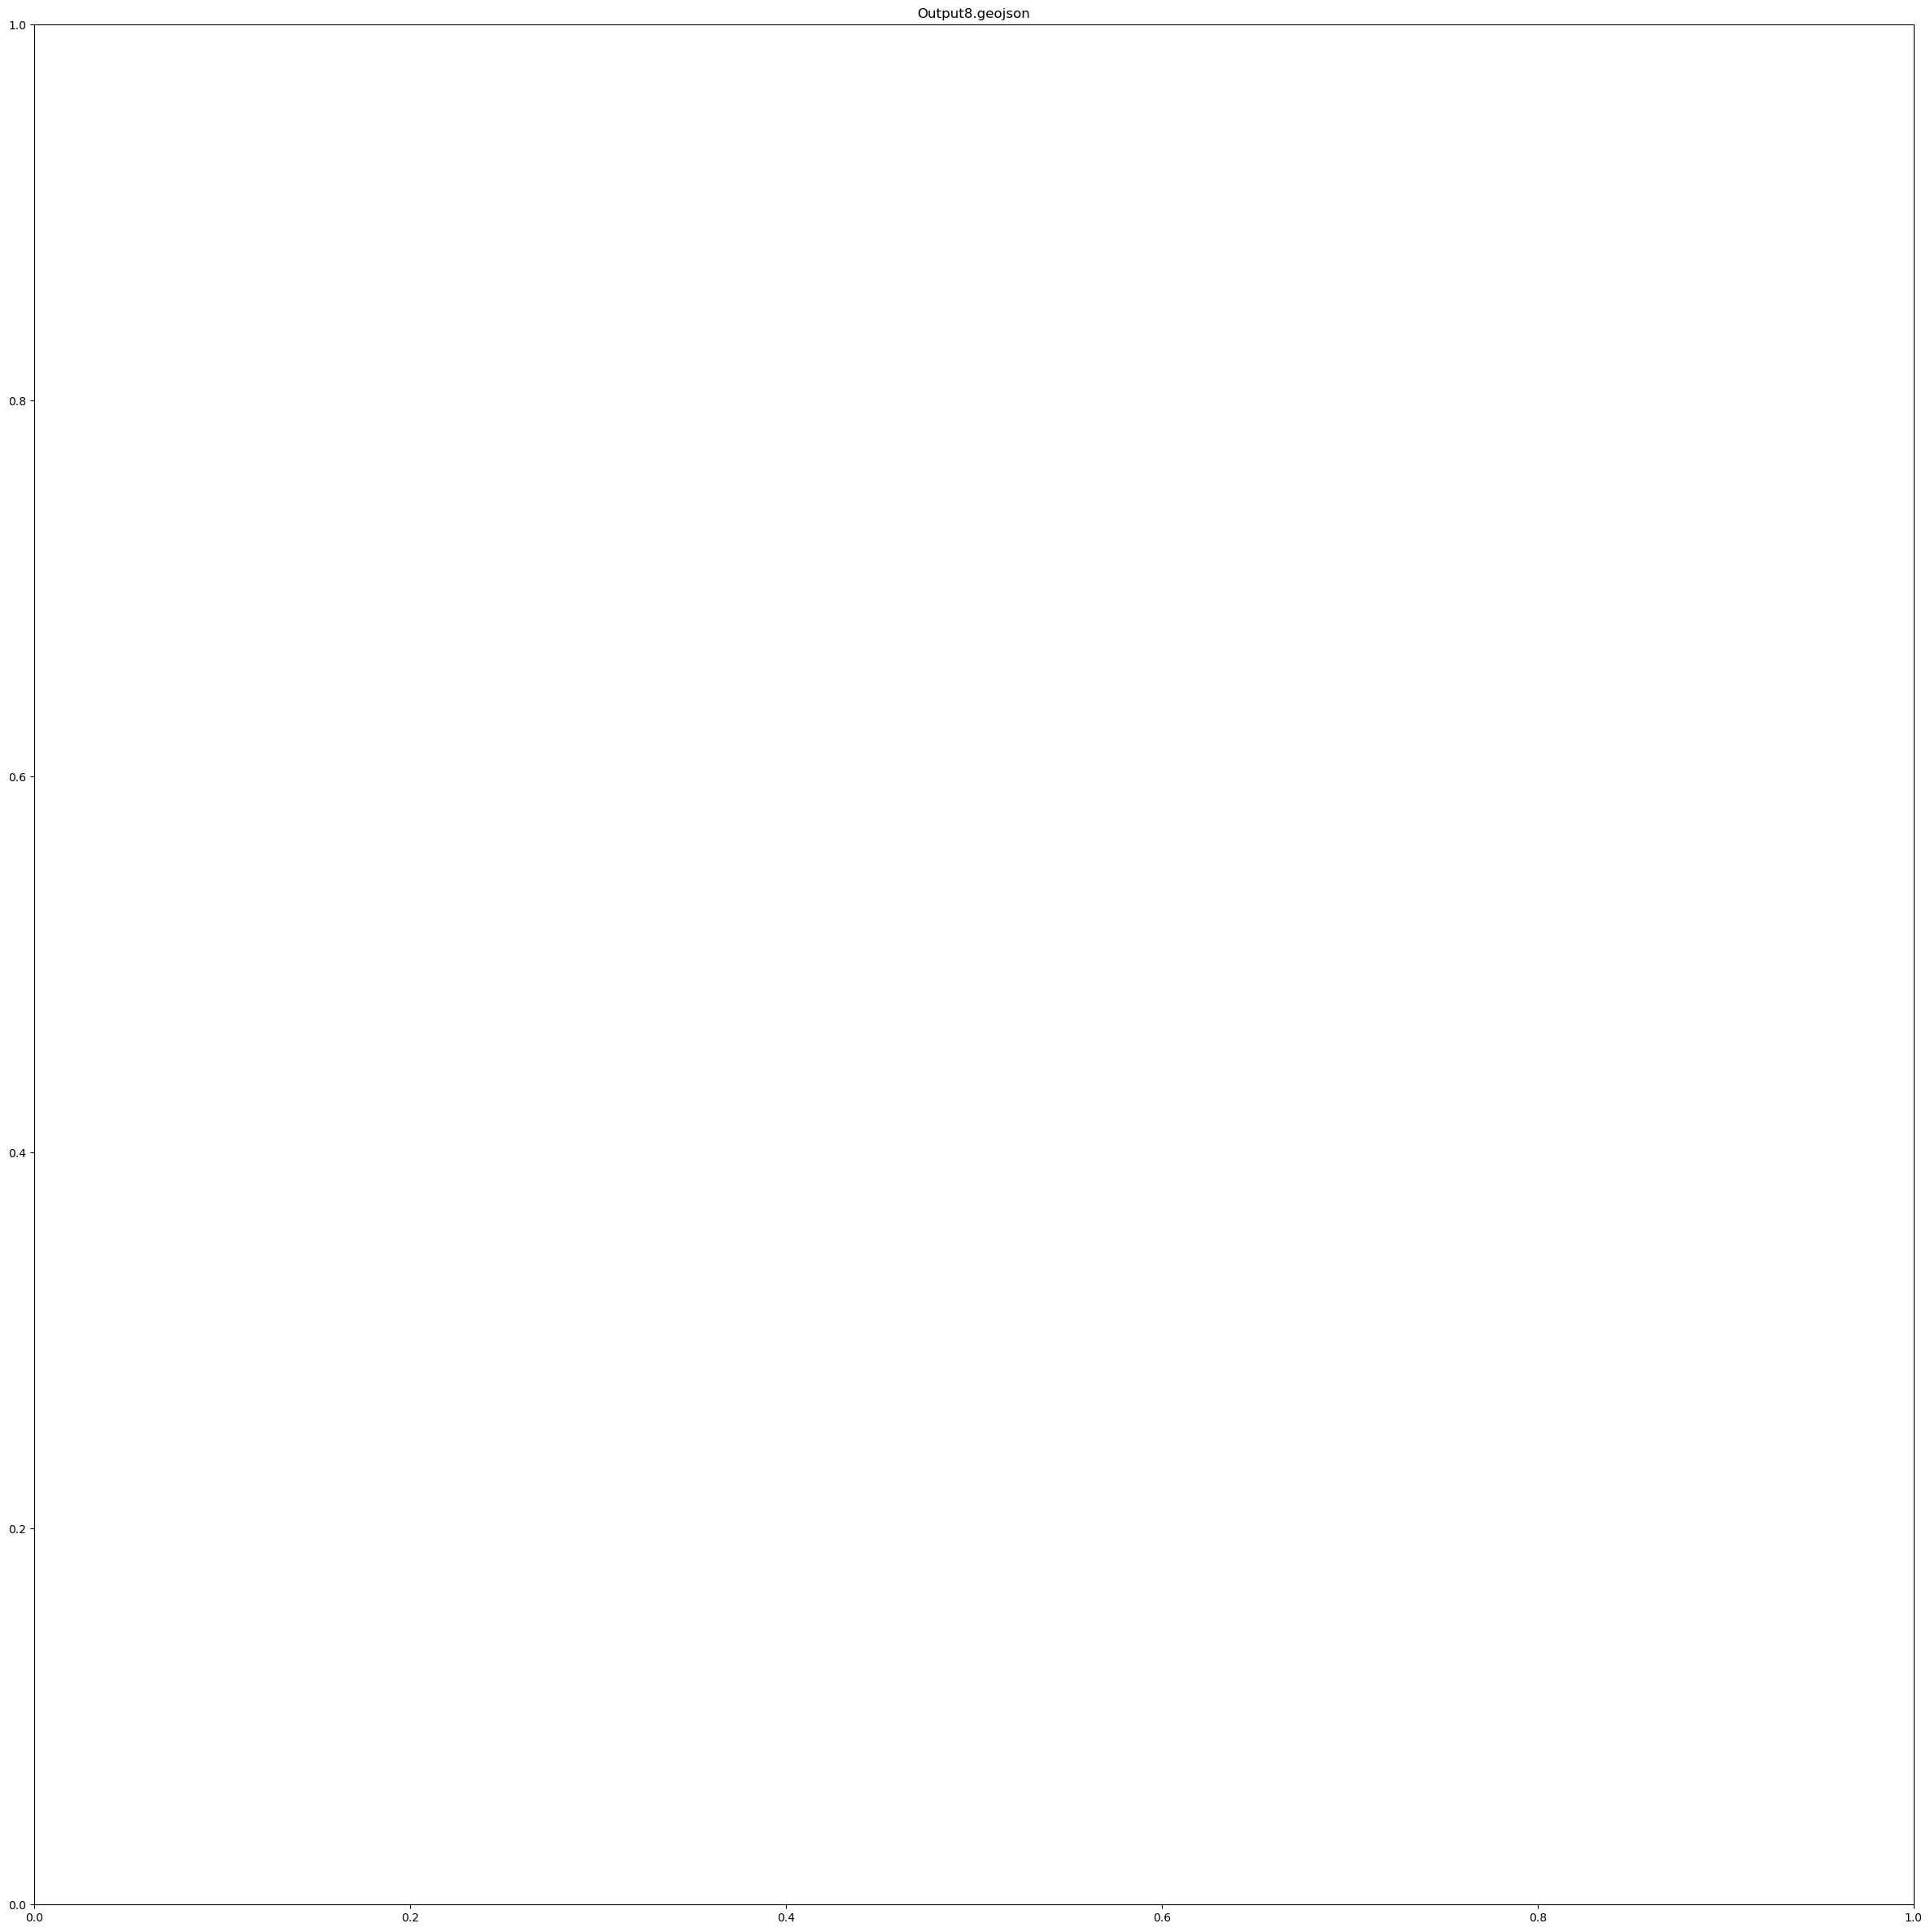

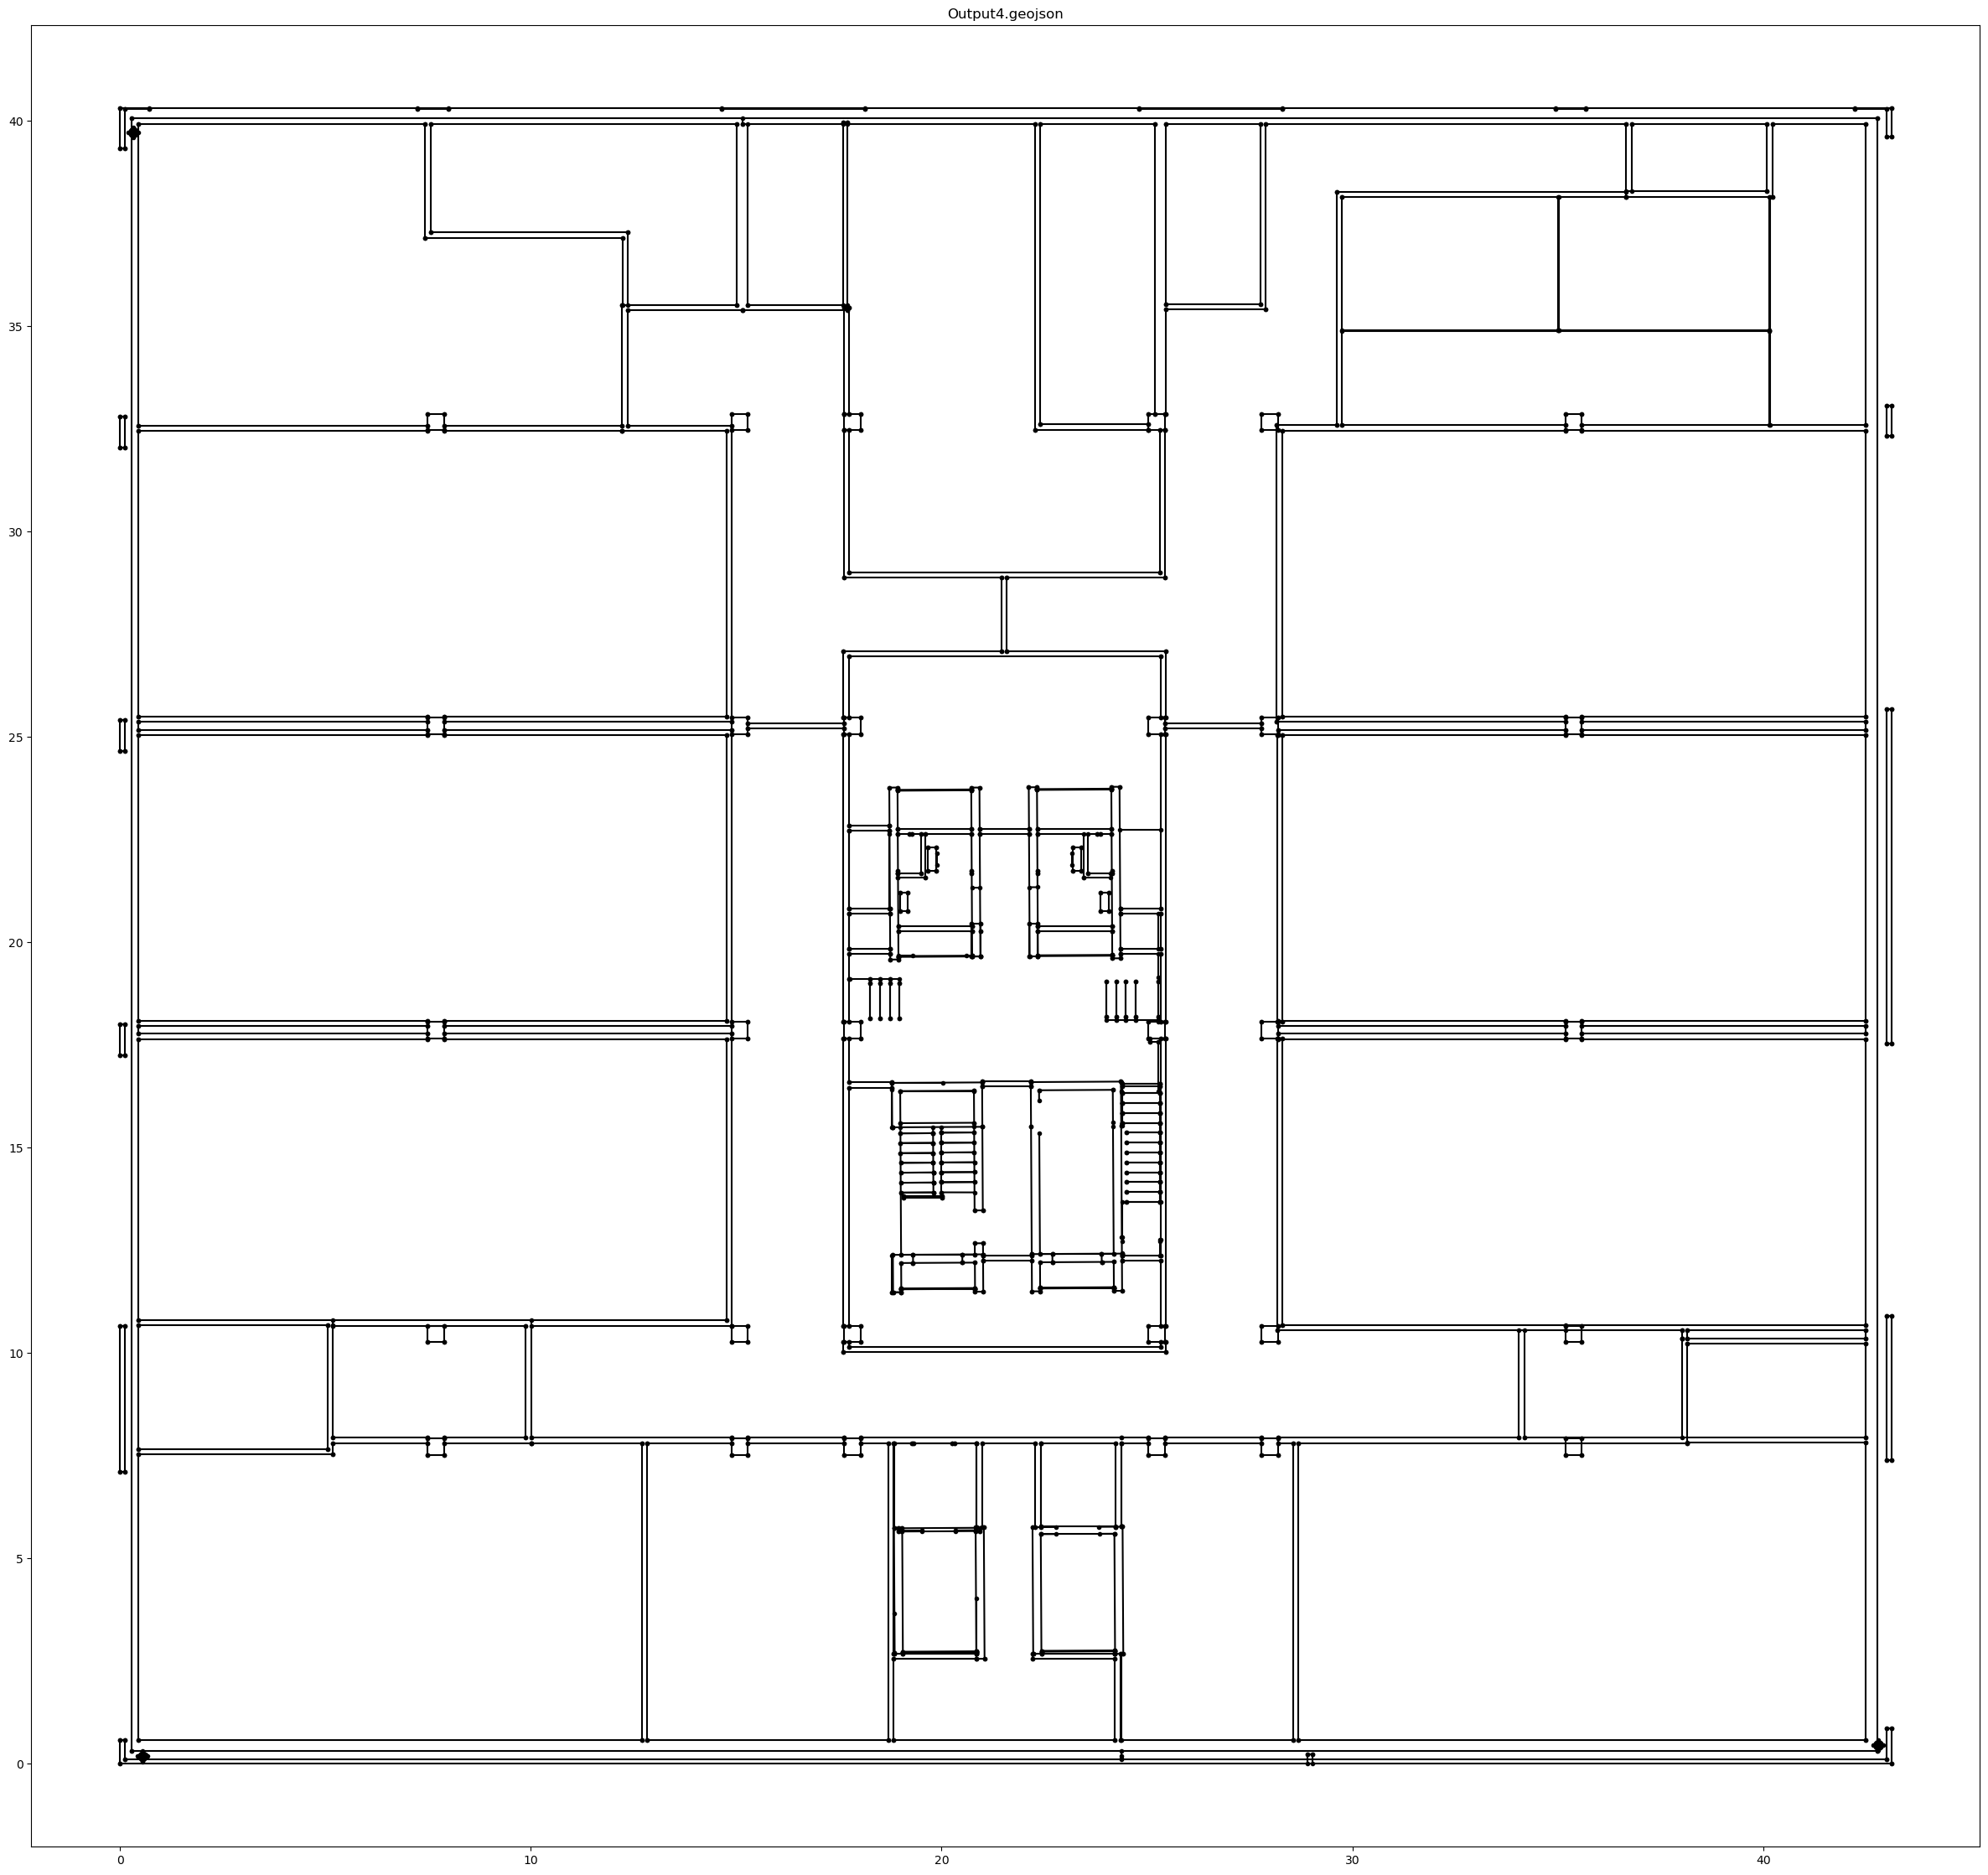

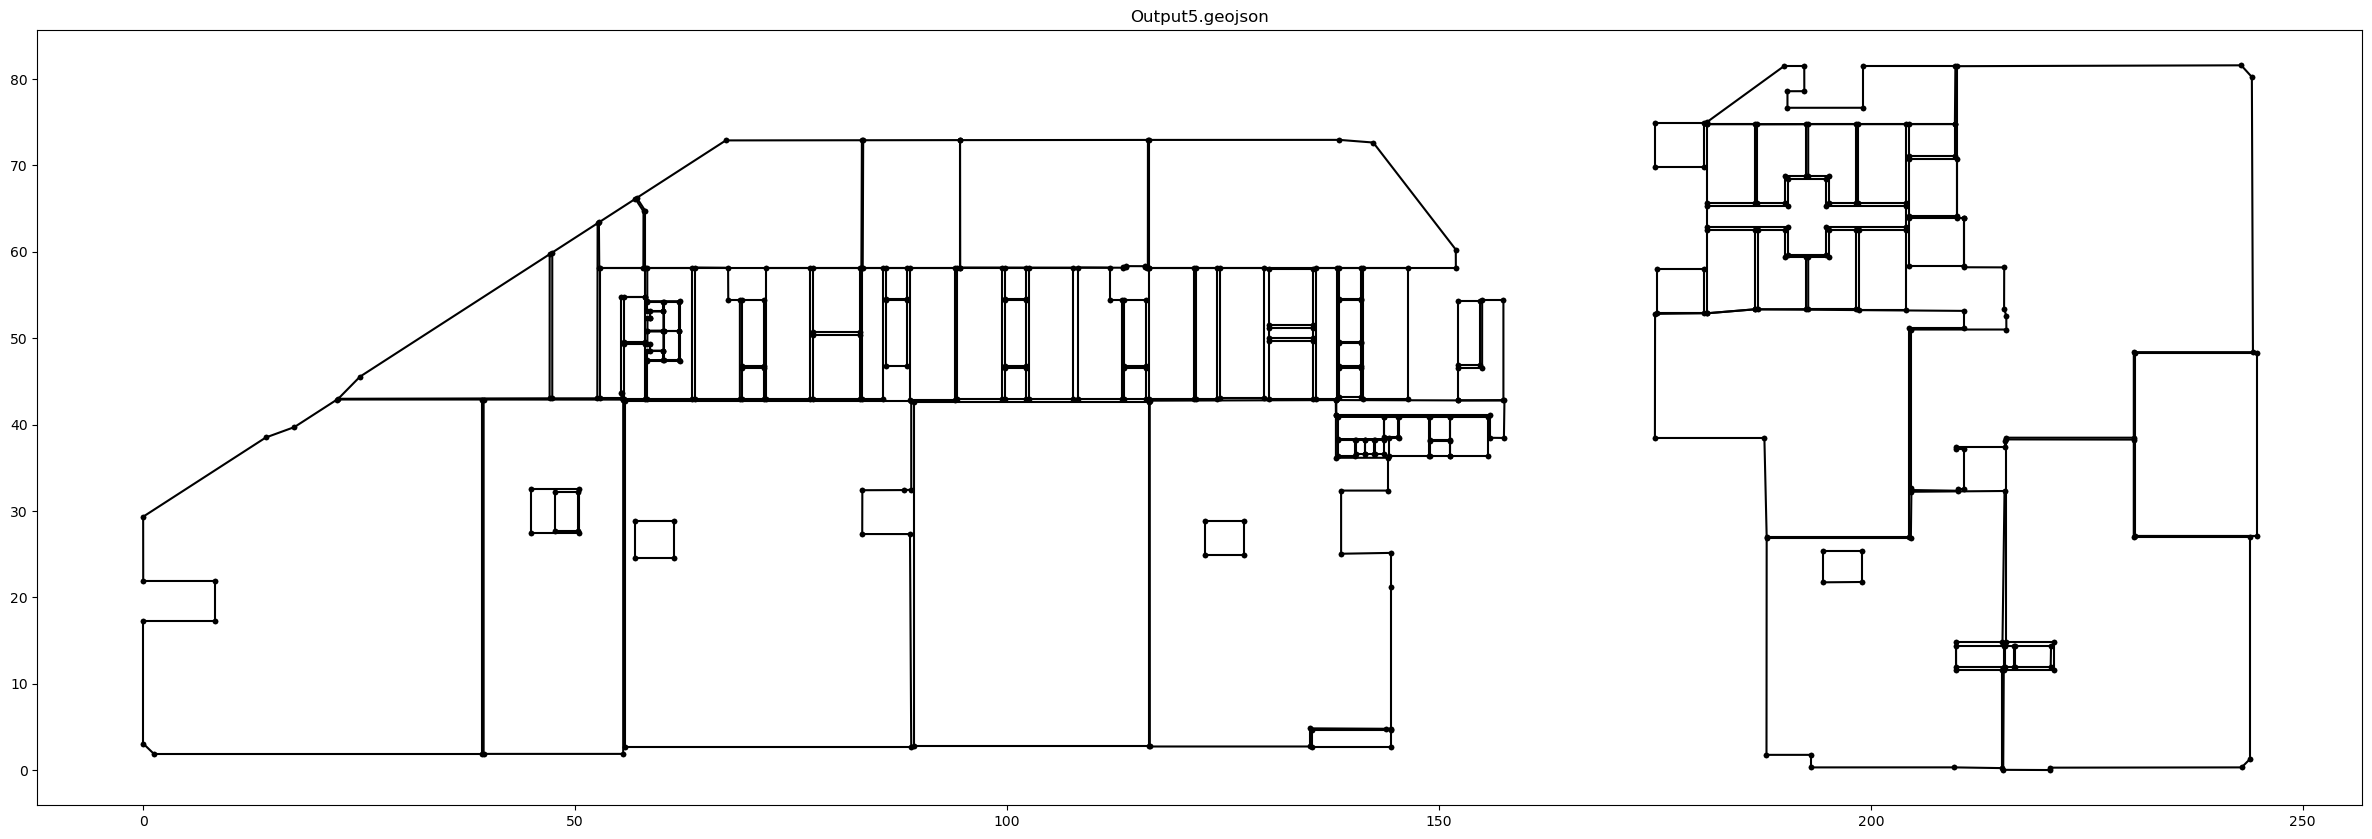

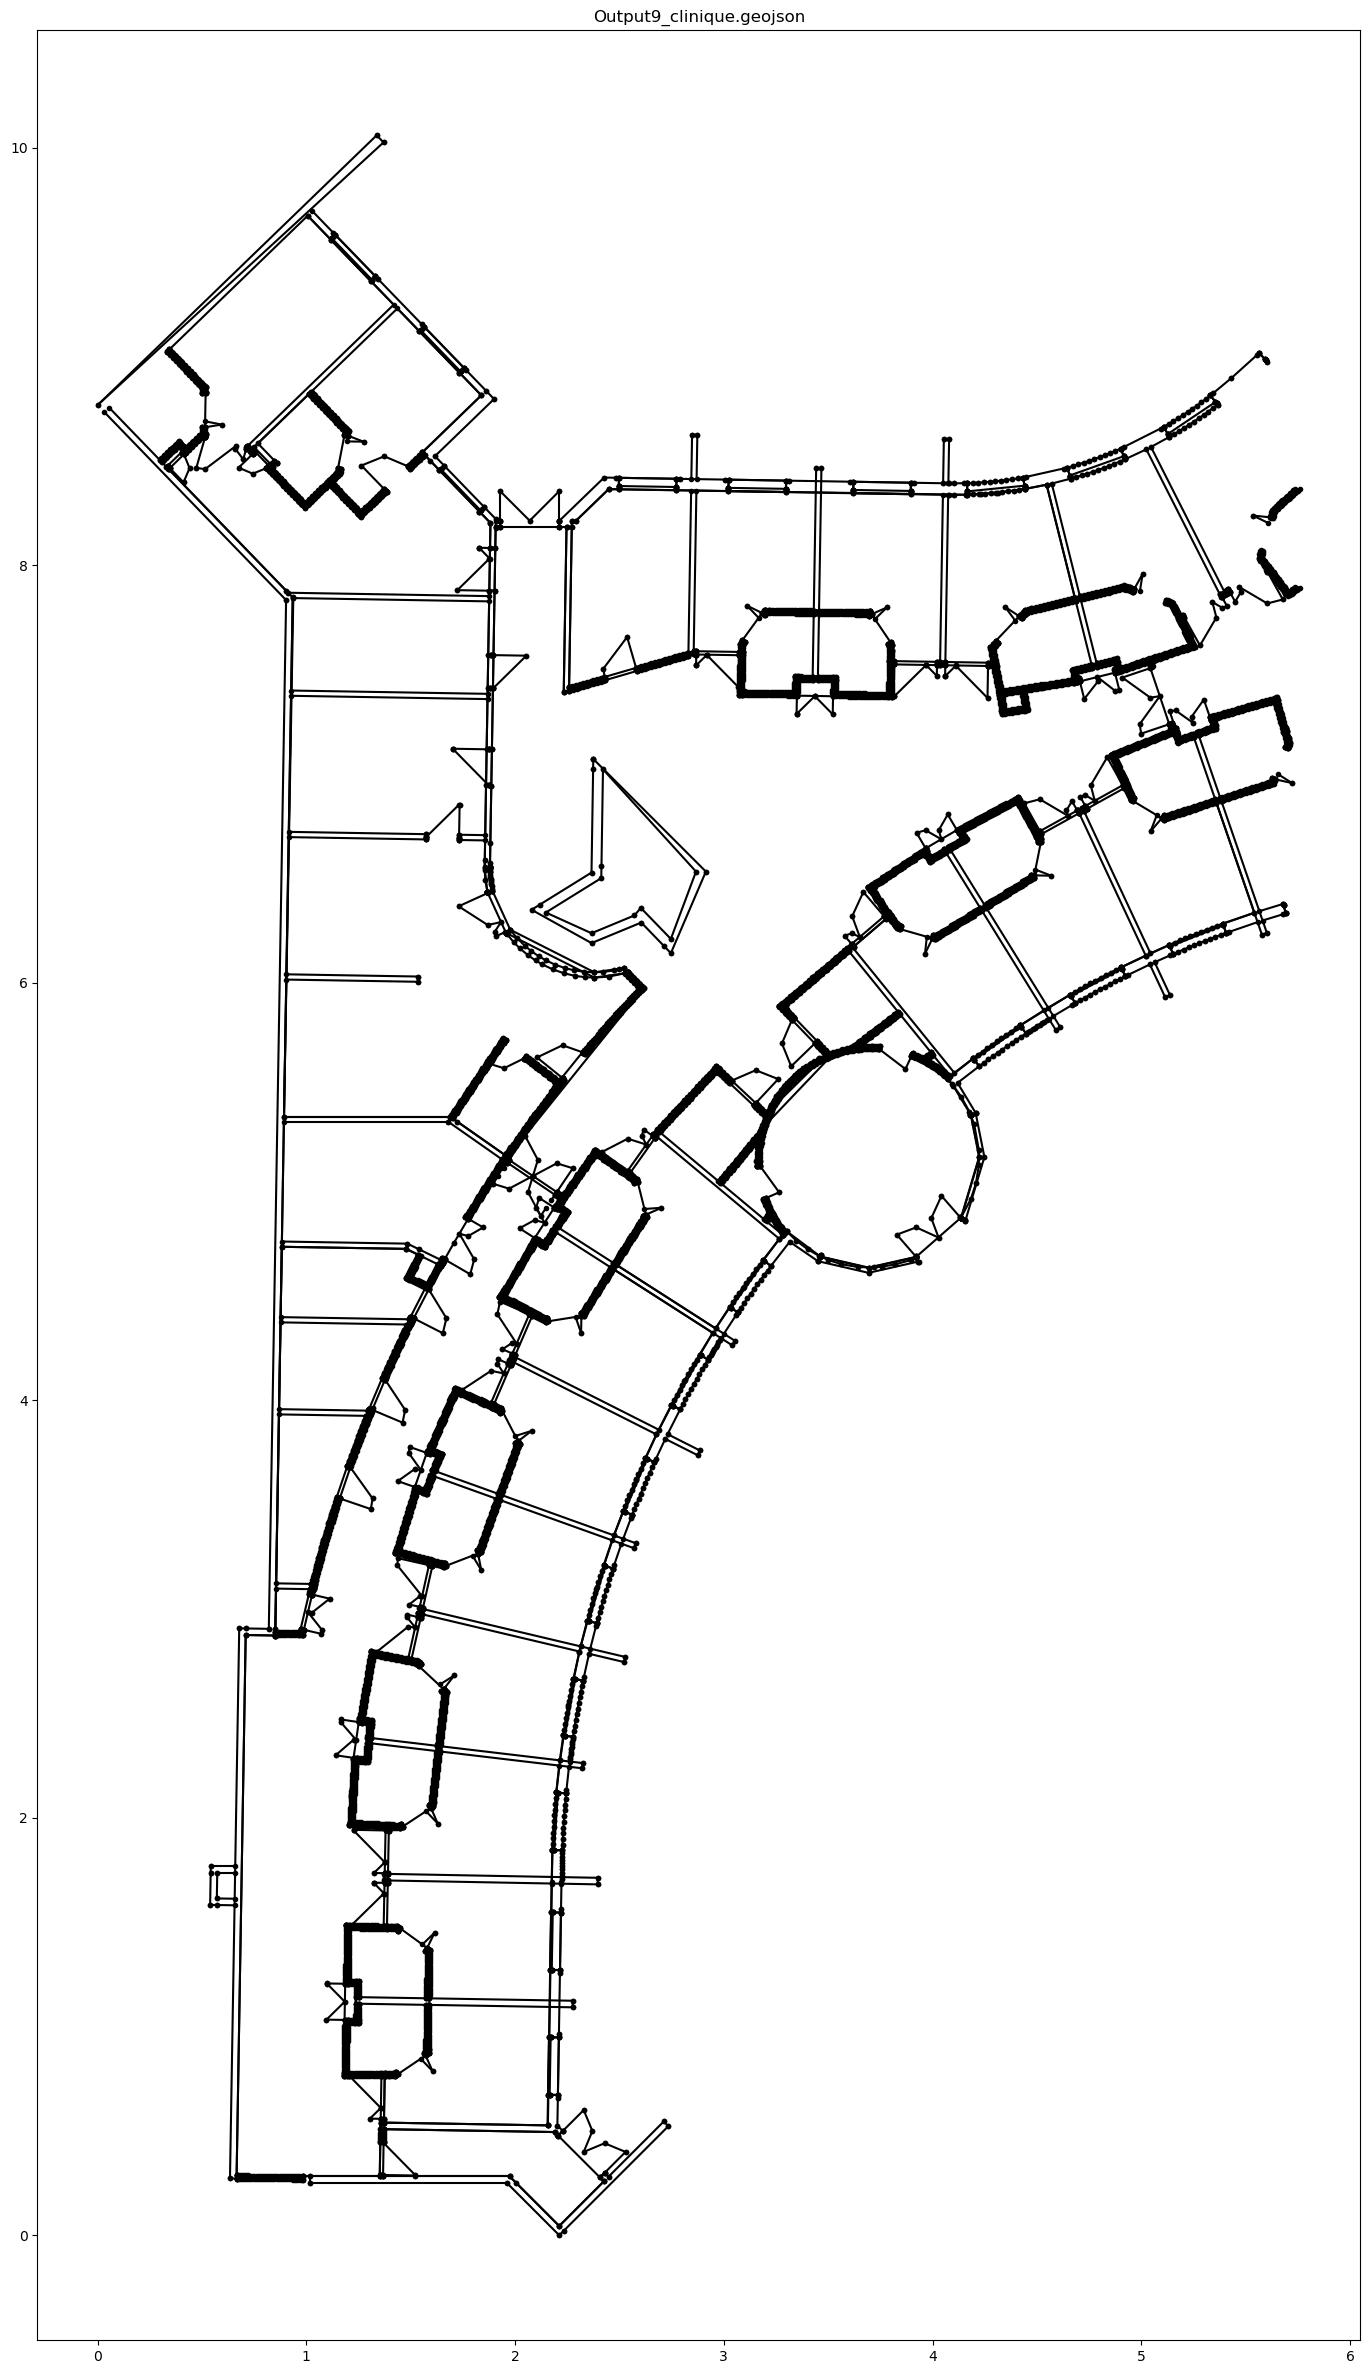

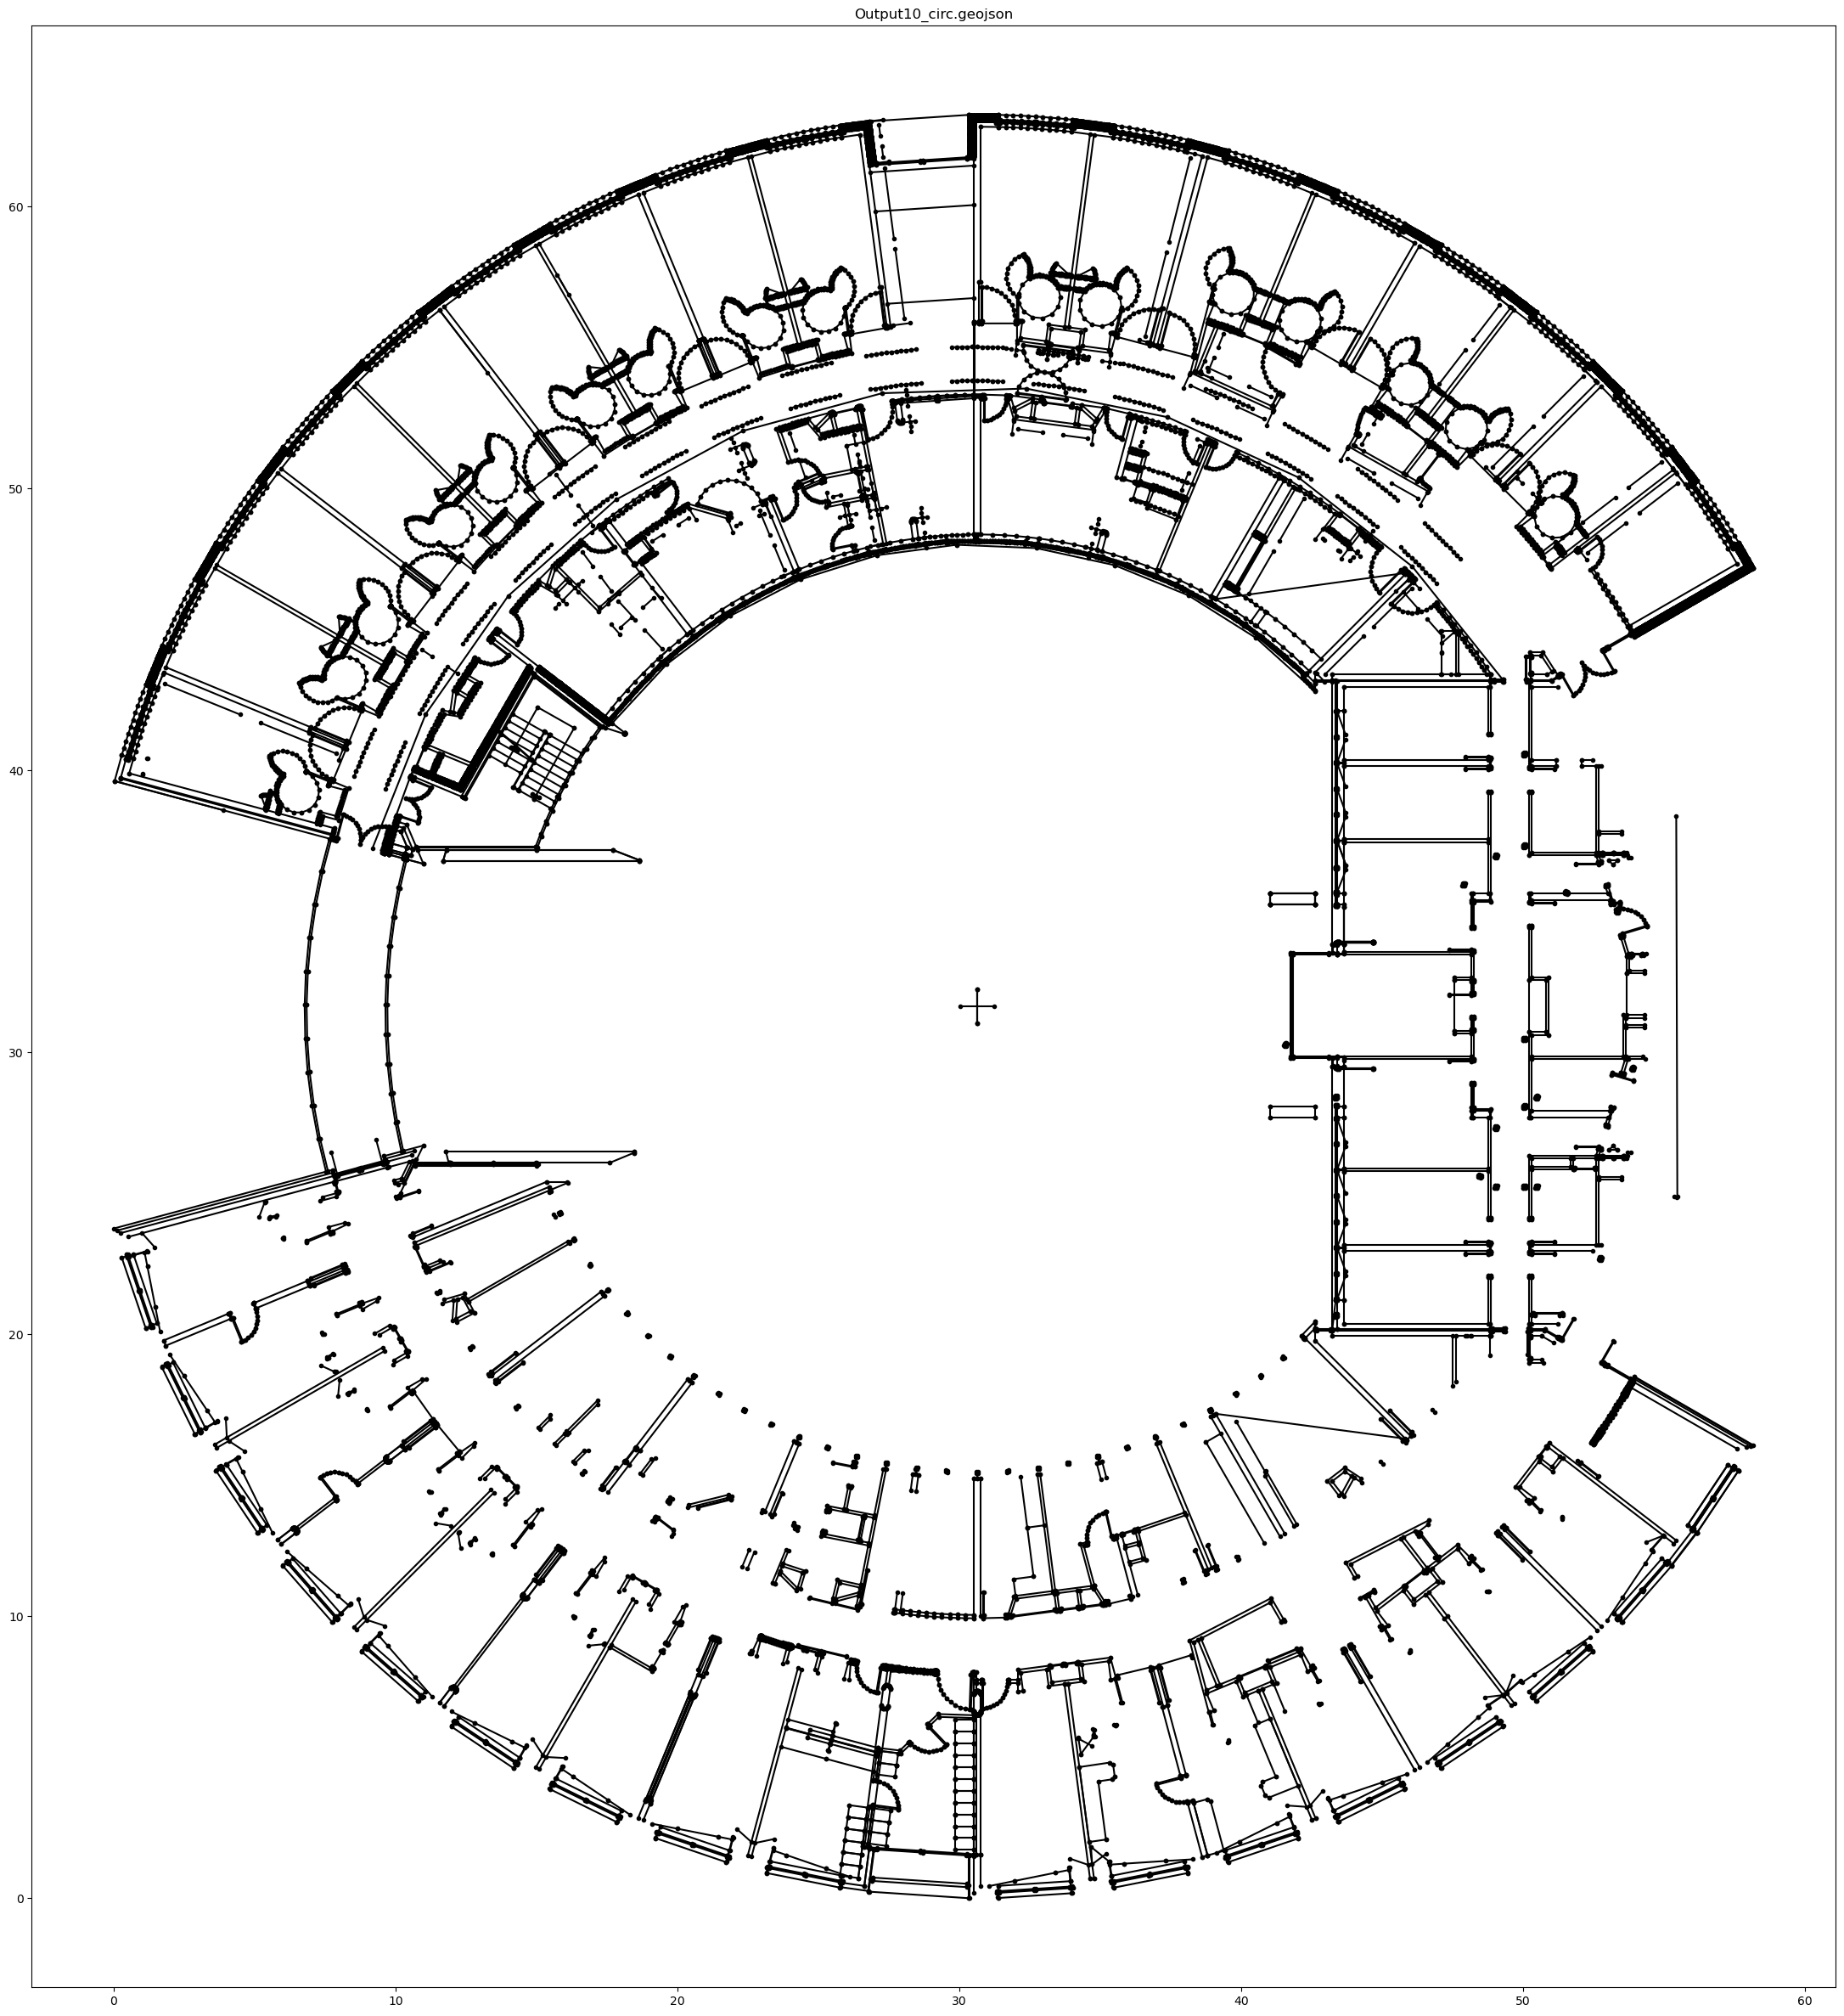

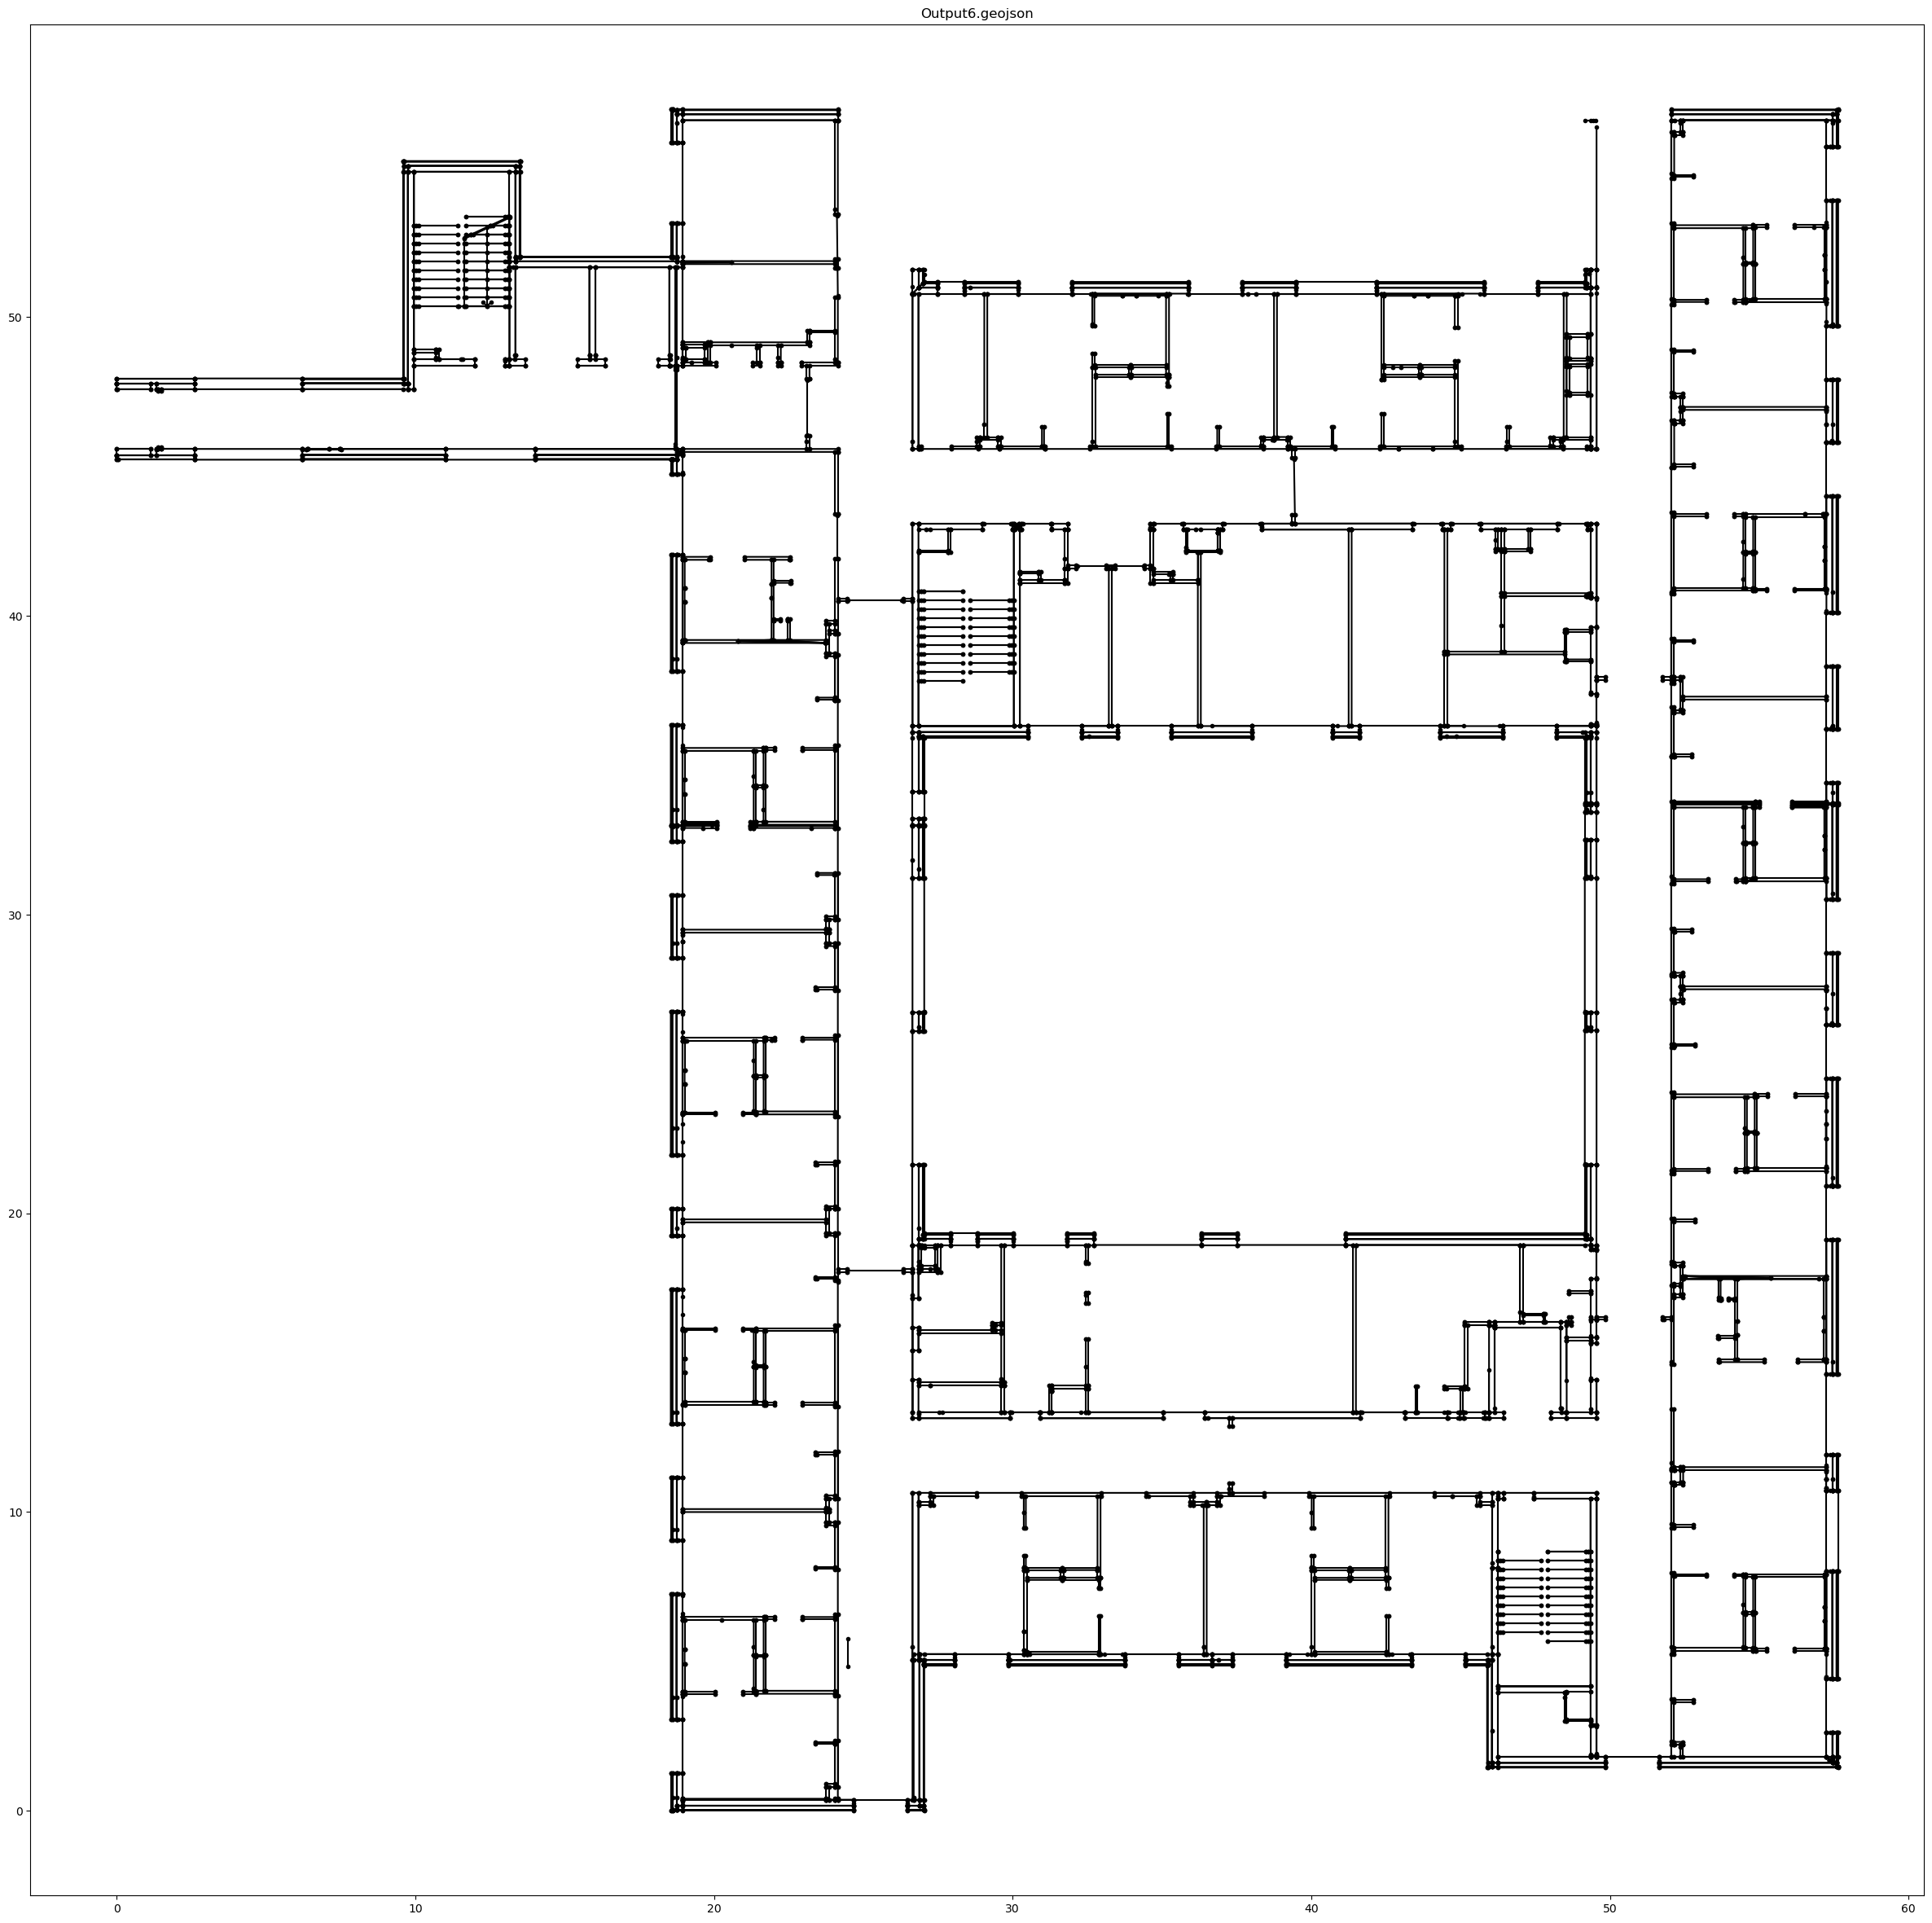

In [81]:
# Check the files
for file in data_dir.iterdir():
    segments = parse_geojson.parse_segments_geojson(file)
    fig, ax = plt.subplots(figsize=(30, 30))
    plot_segments(segments, ax)
    ax.set_title(file.name)